In [ ]:
#!pip install geopandas
#!pip install rasterstats
#!pip install descartes

**Dependencies**

In [1]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import zipfile
from pathlib import Path
import re
#import rasterstats # For zonal statistics. Extracts statistics from rasters files or numpy arrays based on geometries.
#import scikitlearn #The best and at the same time easy-to-use Python machine learning library. Regression, classification, dimensionality reductions etc.
import folium 
#import PySAL #The Python Spatial Analysis Library contains a multitude of functions for spatial analysis, statistical modeling and plotting.

%matplotlib inline

In [2]:
pd.options.display.max_rows
pd.options.display.max_rows = 999
pd.options.display.max_columns= 100

# Data

In [3]:
# READ Data 
FAMEWS = pd.read_csv("Data/FAMEWS_12February2019.csv", sep=',' , encoding='latin-1')
alpha_2= pd.read_csv("Data/Alpha_2.csv",sep=',' , encoding='latin-1')
alpha_2

# Join with country names
FAMEWS= FAMEWS.merge(alpha_2,left_on="country",right_on= "Code",how="left")

/Users/karlapalos/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
FAMEWS

_id                     owner  roles  _vid  _fvid  \
0      5c62cf3f7fed8dcee83a0d61  5c6298d6f64ab0639e03cd75    NaN     0      0   
1      5c62cf3f7fed8dcee83a0d61  5c6298d6f64ab0639e03cd75    NaN     0      0   
2      5c62cf3dcb18c358c69ada20  5c6298d6f64ab0639e03cd75    NaN     0      0   
3      5c62cf3cf64ab0656003d05e  5c6298d6f64ab0639e03cd75    NaN     0      0   
4      5c62ca56f64ab0506703cfcd  5c51726cc07030423f83ae3e    NaN     0      0   
5      5c62ca56f64ab0506703cfcd  5c51726cc07030423f83ae3e    NaN     0      0   
6      5c62ca56f64ab0506703cfcd  5c51726cc07030423f83ae3e    NaN     0      0   
7      5c62ca56f64ab0506703cfcd  5c51726cc07030423f83ae3e    NaN     0      0   
8      5c62ca56f64ab0506703cfcd  5c51726cc07030423f83ae3e    NaN     0      0   
9      5c62ca559ad23765aae83c53  5c51726cc07030423f83ae3e    NaN     0      0   
10     5c62ca559ad23765aae83c53  5c51726cc07030423f83ae3e    NaN     0      0   
11     5c62ca559ad23765aae83c53  5c51726cc07030423f83ae3e    NaN     0      0   
12     5c62ca559ad23765aae83c53  5c51726cc07030423f83ae3e    NaN     0      0   
13     5c62ca559ad23765aae83c53  5c51726cc07030423f83ae3e    NaN     0      0   
14     5c62ca55cb18c31d789ad989  5c51726cc07030423f83ae3e    NaN     0      0   
15     5c62ca55cb18c31d789ad989  5c51726cc07030423f83ae3e    NaN     0      0   
16     5c62ca55cb18c31d789ad989  5c51726cc07030423f83ae3e    NaN     0      0   
17     5c62ca55cb18c31d789ad989  5c51726cc07030423f83ae3e    NaN     0      0   
18     5c62ca55cb18c31d789ad989  5c51726cc07030423f83ae3e    NaN     0      0   
19     5c62c604680885d205ae4a02  5c2fa51b56b250114f7fa674    NaN     0      0   
20     5c62c604680885d205ae4a02  5c2fa51b56b250114f7fa674    NaN     0      0   
21     5c62c6039ad2378135e83c1b  5c2fa51b56b250114f7fa674    NaN     0      0   
22     5c62c6039ad2378135e83c1b  5c2fa51b56b250114f7fa674    NaN     0      0   
23     5c62c28c9ad237dc21e83bf1  5b0e8641cf913f0102cbb715    NaN     0      0   
24     5c62c28c9ad237dc21e83bf1  5b0e8641cf913f0102cbb715    NaN     0      0   
25     5c62c28b68088504fdae49d8  5b0e8641cf913f0102cbb715    NaN     0      0   
26     5c62c28b68088504fdae49d8  5b0e8641cf913f0102cbb715    NaN     0      0   
27     5c62c28bcb18c304f59ad925  5b0e8641cf913f0102cbb715    NaN     0      0   
28     5c62c28bcb18c304f59ad925  5b0e8641cf913f0102cbb715    NaN     0      0   
29     5c62c28af64ab07e9103cf63  5b0e8641cf913f0102cbb715    NaN     0      0   
30     5c62c28af64ab07e9103cf63  5b0e8641cf913f0102cbb715    NaN     0      0   
31     5c62c28a7fed8d07bf3a0c63  5b0e8641cf913f0102cbb715    NaN     0      0   
32     5c62c28a7fed8d07bf3a0c63  5b0e8641cf913f0102cbb715    NaN     0      0   
33     5c62c28a9ad2376dede83bf0  5b0e8641cf913f0102cbb715    NaN     0      0   
34     5c62c28a9ad2376dede83bf0  5b0e8641cf913f0102cbb715    NaN     0      0   
35     5c62c28a68088595cfae49d7  5b0e8641cf913f0102cbb715    NaN     0      0   
36     5c62c28a68088595cfae49d7  5b0e8641cf913f0102cbb715    NaN     0      0   
37     5c62c289cb18c3510f9ad924  5b0e8641cf913f0102cbb715    NaN     0      0   
38     5c62c289cb18c3510f9ad924  5b0e8641cf913f0102cbb715    NaN     0      0   
39     5c62c289f64ab05de503cf62  5b0e8641cf913f0102cbb715    NaN     0      0   
40     5c62c289f64ab05de503cf62  5b0e8641cf913f0102cbb715    NaN     0      0   
41     5c62c2897fed8d6b173a0c62  5b0e8641cf913f0102cbb715    NaN     0      0   
42     5c62c2897fed8d6b173a0c62  5b0e8641cf913f0102cbb715    NaN     0      0   
43     5c62c288cb18c378ce9ad923  5b0e8641cf913f0102cbb715    NaN     0      0   
44     5c62c288cb18c378ce9ad923  5b0e8641cf913f0102cbb715    NaN     0      0   
45     5c62c2889ad23783f3e83bef  5b0e8641cf913f0102cbb715    NaN     0      0   
46     5c62c2889ad23783f3e83bef  5b0e8641cf913f0102cbb715    NaN     0      0   
47     5c62c288680885908fae49d6  5b0e8641cf913f0102cbb715    NaN     0      0   
48     5c62c288680885908fae49d6  5b0e8641cf913f0102cbb715  

In [5]:
FAMEWS.columns
#rapsConfirmedFAW, FAWcropdamage

Index(['_id', 'owner', 'roles', '_vid', '_fvid', 'state', 'deleted', 'date',
       'scouting', 'traps', 'country', 'region', 'locationName',
       'trainingReceived', 'cropMain', 'cropVariety',
       'panelColumns5Maincropplantingdate', 'cropIrrigation', 'cropFertilizer',
       'cropStage', 'cropHealth', 'cropSystem', 'cropFieldSizeUnit',
       'rainLastDate', 'latitude', 'longitude', 'rotationIntercroppingCrop',
       'cropFieldSize', 'rainAmount', 'trapID', 'trapLocation', 'trapType',
       'trapCondition', 'trapLureName', 'trapReplaced', 'trapReplacedDate',
       'trapLureReplaced', 'trapKLureReplacedDate', 'btnGpsPosition',
       'checked', 'faw', 'sample1PlantsChecked', 'sample2PlantsChecked',
       'sample3PlantsChecked', 'sample4PlantsChecked', 'sample5PlantsChecked',
       'totalPlantsChecked', 'pestStageFAW', 'fawColumns4Cobdamage',
       'fawNaturalEnemies', 'fawLarvaeKilledByNaturalEnemies',
       'fawControlUndertaken', 'scoutingPlantsFAW', 'scoutingPercentageF

In [8]:
# List of columns 
FAMEWS_new = FAMEWS[['_id','owner','deleted', 'date',
       'scouting', 'traps', 'country', 'Name','region', 'locationName',
       'trainingReceived', 'cropMain', 'cropVariety',
       'panelColumns5Maincropplantingdate', 'cropIrrigation', 'cropFertilizer',
       'cropStage', 'cropHealth', 'cropSystem', 'cropFieldSizeUnit',
       'rainLastDate', 'latitude', 'longitude', 'rotationIntercroppingCrop',
       'cropFieldSize', 'rainAmount', 'trapID', 'trapLocation', 'trapType',
       'trapCondition', 'trapLureName', 'trapReplaced', 'trapReplacedDate',
       'trapLureReplaced', 'trapKLureReplacedDate', 'btnGpsPosition',
       'checked', 'faw', 'sample1PlantsChecked', 'sample2PlantsChecked',
       'sample3PlantsChecked', 'sample4PlantsChecked', 'sample5PlantsChecked',
       'totalPlantsChecked', 'pestStageFAW', 'fawColumns4Cobdamage',
       'fawNaturalEnemies', 'fawLarvaeKilledByNaturalEnemies',
       'fawControlUndertaken', 'scoutingPlantsFAW', 'scoutingPercentageFAW',
       'totalFAW', 'totalAAW', 'totalBorer', 'scoutingStageFAW', 'userCountry',
        'fawCurrentDamage', 'fawPreviousDamage',
       'fawControlChemicalPesticideName', 'fawControlChemicalPesticideLitres',
       'fawControlLocalTypes', 'fawControlBiopesticideName',
       'fawControlBiopesticideLitres', 'sample1FAW', 'sample2FAW',
       'sample3FAW', 'sample4FAW', 'sample5FAW', 'access', 'form',
       'externalIds', 'created', 'modified','Code']]

In [9]:
# insepecting first few rows 
FAMEWS_new.head()

_id                     owner deleted  \
0  5c62cf3f7fed8dcee83a0d61  5c6298d6f64ab0639e03cd75   False   
1  5c62cf3f7fed8dcee83a0d61  5c6298d6f64ab0639e03cd75   False   
2  5c62cf3dcb18c358c69ada20  5c6298d6f64ab0639e03cd75   False   
3  5c62cf3cf64ab0656003d05e  5c6298d6f64ab0639e03cd75   False   
4  5c62ca56f64ab0506703cfcd  5c51726cc07030423f83ae3e   False   

                       date  scouting  traps country        Name     region  \
0  2019-02-12T13:14:22.000Z     False   True      GH       Ghana    Western   
1  2019-02-12T13:14:22.000Z     False   True      GH       Ghana    Western   
2  2019-02-12T13:29:56.000Z     False   True      GH       Ghana    Western   
3  2019-02-12T13:37:39.000Z     False   True      GH       Ghana    Western   
4  2019-02-12T09:05:54.000Z      True  False      MZ  Mozambique  Inhambane   

        locationName                  trainingReceived         cropMain  \
0      Manso Amenfi   extensionService,focalPerson,ffs          cowpeas   
1      Manso Amenfi   extensionService,focalPerson,ffs          cowpeas   
2        K.  Boateng  focalPerson,extensionService,ffs            maize   
3          Akyekyere  focalPerson,extensionService,ffs  otherVegetables   
4  Massinga -. Urene                  extensionService            maize   

  cropVariety panelColumns5Maincropplantingdate cropIrrigation cropFertilizer  \
0         NaN          2018-12-17T00:00:00.000Z        rainFed             no   
1         NaN          2018-12-17T00:00:00.000Z        rainFed             no   
2    Obatanpa          2019-01-01T00:00:00.000Z        rainFed             no   
3        Okro          2018-12-20T00:00:00.000Z      irrigated            yes   
4       Local          2018-12-11T22:00:00.000Z        rainFed             no   

      cropStage cropHealth     cropSystem cropFieldSizeUnit  \
0    vegetative     medium  intercropping              acre   
1    vegetative     medium  intercropping              acre   
2      seedling       good       seasonal              acre   
3    vegetative       good  intercropping              acre   
4  reproductive     medium  intercropping                ha   

               rainLastDate   latitude  longitude rotationIntercroppingCrop  \
0  2019-02-02T00:00:00.000Z   5.646451  -2.266976             cassavaManioc   
1  2019-02-02T00:00:00.000Z   5.646451  -2.266976             cassavaManioc   
2  2019-02-02T00:00:00.000Z   5.636100  -2.575280                       NaN   
3  2019-02-02T00:00:00.000Z   5.707828  -2.324328                     maize   
4  2019-01-11T22:00:00.000Z -23.382477  35.313438                   soybean   

   cropFieldSize rainAmount    trapID trapLocation     trapType trapCondition  \
0           0.82      heavy  GHWRWC01         edge  stickyDelta       working   
1           0.82      heavy  GHWRWC01       centre  stickyDelta       working   
2           1.50   moderate  GHWRWC02         edge  stickyDelta       working   
3           3.00      heavy  GHWRWC03       centre  stickyDelta       working   
4           2.00      trace       NaN          NaN          NaN           NaN   

  trapLureName    trapReplaced trapReplacedDate trapLureReplaced  \
0     pherobio  1Week1MonthAgo              NaN           2Weeks   
1     pherobio  1Week1MonthAgo              NaN            1Week   
2     pherobio  1Week1MonthAgo              NaN            1Week   
3     pherobio  1Week1MonthAgo              NaN            1Week   
4          NaN             NaN              NaN              NaN   

  trapKLureReplacedDate btnGpsPosition  checked  faw  sample1PlantsChecked  \
0                   NaN          False      NaN  NaN                   NaN   
1                   NaN          False      NaN  NaN                   NaN   
2                   NaN          False      NaN  NaN                   NaN   
3                   NaN          False      NaN  NaN                   NaN   
4                   NaN          False     10.0  1.0                  10.0   

 

---
# Data Cleaning 
---

## Temporality 
---

* Checking for basic dependencies: Program was launched on 2018 (2018-03-03T17:13:26.000Z). Check how many rows appear before this date and remove them.

In [10]:
FAMEWS_new[FAMEWS_new['date'] < '2018-03-03T17:13:26.000Z'].shape[0]

144

114 entry points 
* Notice that 9 rows are from `1970-01-01T23:24:04.000Z` error - data was misread
* Notice that 4 rows are from  `2011-11-03T09:41:00.000Z`
* Notice that 101 rows are from `2018-01-01T00:51:00.000Z`, `2018-02-27T13:43:00.000Z`, `2018-03-01T14:05:55.000Z` - Trials before release?

**Remove 144 entries**

In [11]:
FAMEWS_temp = FAMEWS_new[FAMEWS_new['date'] >= '2018-03-03T17:13:26.000Z']

---
## Duplicates 
---

In [12]:
# number of rows 
len(FAMEWS_temp)

47908

**Drop duplicates**

In [13]:
FAMEWS_dup= FAMEWS_temp.drop_duplicates()
len(FAMEWS_dup)

#removed 10871 rows 

37037

---
## Select Columns
---

## 1.
**Want to know if it is worth keeping totalFAW, totalAAW, and totalBorer or it was just accounted for in scoutingPlantsFAW**

In [14]:
FAMEWS_dup[FAMEWS_dup["totalFAW"]>=0.0].shape
# (21050, 73)- Helps remove NaN values for this case. Also- helped confrimed that there are values on this column. 
# Worth keeping for now. 

(21050, 74)

In [16]:
selected = ["_id",'owner', "date",
            "Name","country",
            "region","locationName","latitude", "longitude",
            "scouting", "traps","trainingReceived",
            "cropMain", "cropVariety", "cropIrrigation", 
            "cropFertilizer","cropStage","cropStage",
            "cropHealth", "cropSystem", "cropFieldSizeUnit", 
            "cropFieldSize", "rotationIntercroppingCrop",
            "rainLastDate","rainAmount", 
            
            "checked", "faw", 
            
            "scoutingPlantsFAW", "scoutingPercentageFAW", 
            "totalFAW", "totalAAW", "totalBorer",
           
            "trapType","trapCondition"]

FAMEWS_selected= FAMEWS_dup[selected]
FAMEWS_selected.head(5)

_id                     owner  \
0  5c62cf3f7fed8dcee83a0d61  5c6298d6f64ab0639e03cd75   
1  5c62cf3f7fed8dcee83a0d61  5c6298d6f64ab0639e03cd75   
2  5c62cf3dcb18c358c69ada20  5c6298d6f64ab0639e03cd75   
3  5c62cf3cf64ab0656003d05e  5c6298d6f64ab0639e03cd75   
4  5c62ca56f64ab0506703cfcd  5c51726cc07030423f83ae3e   

                       date        Name country     region       locationName  \
0  2019-02-12T13:14:22.000Z       Ghana      GH    Western      Manso Amenfi    
1  2019-02-12T13:14:22.000Z       Ghana      GH    Western      Manso Amenfi    
2  2019-02-12T13:29:56.000Z       Ghana      GH    Western        K.  Boateng   
3  2019-02-12T13:37:39.000Z       Ghana      GH    Western          Akyekyere   
4  2019-02-12T09:05:54.000Z  Mozambique      MZ  Inhambane  Massinga -. Urene   

    latitude  longitude  scouting  traps                  trainingReceived  \
0   5.646451  -2.266976     False   True  extensionService,focalPerson,ffs   
1   5.646451  -2.266976     False   True  extensionService,focalPerson,ffs   
2   5.636100  -2.575280     False   True  focalPerson,extensionService,ffs   
3   5.707828  -2.324328     False   True  focalPerson,extensionService,ffs   
4 -23.382477  35.313438      True  False                  extensionService   

          cropMain cropVariety cropIrrigation cropFertilizer     cropStage  \
0          cowpeas         NaN        rainFed             no    vegetative   
1          cowpeas         NaN        rainFed             no    vegetative   
2            maize    Obatanpa        rainFed             no      seedling   
3  otherVegetables        Okro      irrigated            yes    vegetative   
4            maize       Local        rainFed             no  reproductive   

      cropStage cropHealth     cropSystem cropFieldSizeUnit  cropFieldSize  \
0    vegetative     medium  intercropping              acre           0.82   
1    vegetative     medium  intercropping              acre           0.82   
2      seedling       good       seasonal              acre           1.50   
3    vegetative       good  intercropping              acre           3.00   
4  reproductive     medium  intercropping                ha           2.00   

  rotationIntercroppingCrop              rainLastDate rainAmount  checked  \
0             cassavaManioc  2019-02-02T00:00:00.000Z      heavy      NaN   
1             cassavaManioc  2019-02-02T00:00:00.000Z      heavy      NaN   
2                       NaN  2019-02-02T00:00:00.000Z   moderate      NaN   
3                     maize  2019-02-02T00:00:00.000Z      heavy      NaN   
4                   soybean  2019-01-11T22:00:00.000Z      trace     10.0   

   faw  scoutingPlantsFAW  scoutingPercentageFAW  totalFAW  totalAAW  \
0  NaN                NaN                    NaN       NaN       NaN   
1  NaN                NaN                    NaN       NaN       NaN   
2  NaN                NaN                    NaN       NaN       NaN   
3  NaN                NaN                    NaN       NaN       NaN   
4  1.0               18.0                   36.0       0.0       0.0   

   totalBorer     trapType trapCondition  
0         NaN  stickyDelta       working  
1         NaN  stickyDelta       working  
2         NaN  stickyDelta       working  
3         NaN  stickyDelta       working  
4         0.0          NaN           NaN

---
## Transformations

* column edits
---

## 1. 
**cropFieldSizeUnit [acre/ha] & cropFieldSize [numeric]** - Chose standard field sieze unit. Useful when checking spread/region 

In [17]:
FAMEWS_selected.groupby(["cropFieldSizeUnit"]).count()["_id"]

cropFieldSizeUnit
acre     5967
ha      29249
m2       1802
yd2        19
Name: _id, dtype: int64

In [18]:
# # from acre to ha - divide acre by 2.471
# # from m2 to ha - 	 divide the area value by 10000
# # from yd2 to ha - for an approximate result, divide the area value by 11959.9

by_acre= FAMEWS_selected[FAMEWS_selected["cropFieldSizeUnit"] == "acre"]
by_acre.insert(21, "cropFieldSize_ha", by_acre["cropFieldSize"]/2.471, True) 
by_acre.insert(21,"cropFieldSizeUnit_ha", len(by_acre["cropFieldSize"])*["ha"])

by_m2= FAMEWS_selected[FAMEWS_selected["cropFieldSizeUnit"] == "m2"]
by_m2.insert(21, "cropFieldSize_ha", by_m2["cropFieldSize"]/1000, True) 
by_m2.insert(21,"cropFieldSizeUnit_ha", len(by_m2["cropFieldSize"])*["ha"])

by_yd2= FAMEWS_selected[FAMEWS_selected["cropFieldSizeUnit"] == "yd2"]
by_yd2.insert(21, "cropFieldSize_ha", by_yd2["cropFieldSize"]/11959.9, True) 
by_yd2.insert(21,"cropFieldSizeUnit_ha", len(by_yd2["cropFieldSize"])*["ha"])


by_ha= FAMEWS_selected[FAMEWS_selected["cropFieldSizeUnit"] == "ha"]
by_ha.insert(21, "cropFieldSize_ha", by_ha["cropFieldSize"], True) 
by_ha.insert(21,"cropFieldSizeUnit_ha", len(by_ha["cropFieldSize"])*["ha"])


all_dfs = [by_acre, by_m2, by_yd2,by_ha]
FAMEWS_selected= pd.concat(all_dfs).reset_index(drop=True)

FAMEWS_selected.drop(["cropFieldSizeUnit","cropFieldSize"],axis=1,inplace=True)
FAMEWS_selected.head()

_id                     owner  \
0  5c62cf3f7fed8dcee83a0d61  5c6298d6f64ab0639e03cd75   
1  5c62cf3f7fed8dcee83a0d61  5c6298d6f64ab0639e03cd75   
2  5c62cf3dcb18c358c69ada20  5c6298d6f64ab0639e03cd75   
3  5c62cf3cf64ab0656003d05e  5c6298d6f64ab0639e03cd75   
4  5c62c604680885d205ae4a02  5c2fa51b56b250114f7fa674   

                       date    Name country   region  \
0  2019-02-12T13:14:22.000Z   Ghana      GH  Western   
1  2019-02-12T13:14:22.000Z   Ghana      GH  Western   
2  2019-02-12T13:29:56.000Z   Ghana      GH  Western   
3  2019-02-12T13:37:39.000Z   Ghana      GH  Western   
4  2019-02-12T12:48:39.000Z  Zambia      ZM  Eastern   

                   locationName   latitude  longitude  scouting  traps  \
0                 Manso Amenfi    5.646451  -2.266976     False   True   
1                 Manso Amenfi    5.646451  -2.266976     False   True   
2                   K.  Boateng   5.636100  -2.575280     False   True   
3                     Akyekyere   5.707828  -2.324328     False   True   
4  Chinini cap chipata district  13.410000  32.300000     False   True   

                   trainingReceived         cropMain cropVariety  \
0  extensionService,focalPerson,ffs          cowpeas         NaN   
1  extensionService,focalPerson,ffs          cowpeas         NaN   
2  focalPerson,extensionService,ffs            maize    Obatanpa   
3  focalPerson,extensionService,ffs  otherVegetables        Okro   
4                              none            maize   Pannar 53   

  cropIrrigation cropFertilizer     cropStage     cropStage cropHealth  \
0        rainFed             no    vegetative    vegetative     medium   
1        rainFed             no    vegetative    vegetative     medium   
2        rainFed             no      seedling      seedling       good   
3      irrigated            yes    vegetative    vegetative       good   
4        rainFed            yes  reproductive  reproductive       good   

      cropSystem cropFieldSizeUnit_ha  cropFieldSize_ha  \
0  intercropping                   ha          0.331849   
1  intercropping                   ha          0.331849   
2       seasonal                   ha          0.607042   
3  intercropping                   ha          1.214083   
4       seasonal                   ha          0.404694   

  rotationIntercroppingCrop              rainLastDate rainAmount  checked  \
0             cassavaManioc  2019-02-02T00:00:00.000Z      heavy      NaN   
1             cassavaManioc  2019-02-02T00:00:00.000Z      heavy      NaN   
2                       NaN  2019-02-02T00:00:00.000Z   moderate      NaN   
3                     maize  2019-02-02T00:00:00.000Z      heavy      NaN   
4                       NaN  2019-02-09T22:00:00.000Z      light      NaN   

   faw  scoutingPlantsFAW  scoutingPercentageFAW  totalFAW  totalAAW  \
0  NaN                NaN                    NaN       NaN       NaN   
1  NaN                NaN                    NaN       NaN       NaN   
2  NaN                NaN                    NaN       NaN       NaN   
3  NaN                NaN                    NaN       NaN       NaN   
4  NaN                NaN                    NaN       NaN       NaN   

   totalBorer     trapType trapCondition  
0         NaN  stickyDelta       working  
1         NaN  stickyDelta       working  
2         NaN  stickyDelta       working  
3         NaN  stickyDelta       working  
4         NaN       bucket       working

### 2. 

**Replacing NaN values in**

* totalFAW	
* totalAAW	
* totalBorer
* checked
* faw	
* scoutingPlantsFAW	
* scoutingPercentageFAW	

In [59]:
FAMEWS_selected.faw[1]

AttributeError: 'numpy.float64' object has no attribute 'isnan'

---
## New Features 
---

## 1. 

**days_since_last_rain**

**New column** number of days since last rain. Use **rainLastDate**- date-time and get difference from the date in which it was reported **date**

In [ ]:
from datetime import datetime
from datetime import date
from datetime import time


In [19]:
#convert date to datetime 
FAMEWS_selected['rainLastDate']=pd.to_datetime(FAMEWS_selected['rainLastDate'])
#convert rainLastDate to datetime
FAMEWS_selected['date']=pd.to_datetime(FAMEWS_selected['date'])

In [20]:
# Extract just days variables from date
FAMEWS_selected.insert(2,"date_date", FAMEWS_selected["date"].apply(lambda x: x.date()), True)  # comment out true to avoid getting a another column 

# Extract just days variables from rainLastDate_date
FAMEWS_selected.insert(25,"rainLastDate_date", FAMEWS_selected["rainLastDate"].apply(lambda x: x.date()), True) 

In [21]:
FAMEWS_selected.insert(26,"rainLastDate_date", FAMEWS_selected["date_date"]-FAMEWS_selected["rainLastDate_date"],True)

In [64]:
FAMEWS_selected.head(10)

_id                     owner   date_date  \
0  5c62cf3f7fed8dcee83a0d61  5c6298d6f64ab0639e03cd75  2019-02-12   
1  5c62cf3f7fed8dcee83a0d61  5c6298d6f64ab0639e03cd75  2019-02-12   
2  5c62cf3dcb18c358c69ada20  5c6298d6f64ab0639e03cd75  2019-02-12   
3  5c62cf3cf64ab0656003d05e  5c6298d6f64ab0639e03cd75  2019-02-12   
4  5c62c604680885d205ae4a02  5c2fa51b56b250114f7fa674  2019-02-12   
5  5c62c6039ad2378135e83c1b  5c2fa51b56b250114f7fa674  2019-02-12   
6  5c62bc8d9ad2370e10e83bbb  5c3f41e9411a0d11eabd32e2  2019-02-12   
7  5c62bc8d7fed8d18563a0c21  5c3f41e9411a0d11eabd32e2  2019-02-12   
8  5c62ba859ad237716de83b9e  5c3f41e9411a0d11eabd32e2  2019-02-12   
9  5c62ba859ad237716de83b9e  5c3f41e9411a0d11eabd32e2  2019-02-12   

                 date    Name country   region                  locationName  \
0 2019-02-12 13:14:22   Ghana      GH  Western                 Manso Amenfi    
1 2019-02-12 13:14:22   Ghana      GH  Western                 Manso Amenfi    
2 2019-02-12 13:29:56   Ghana      GH  Western                   K.  Boateng   
3 2019-02-12 13:37:39   Ghana      GH  Western                     Akyekyere   
4 2019-02-12 12:48:39  Zambia      ZM  Eastern  Chinini cap chipata district   
5 2019-02-12 12:48:39  Zambia      ZM  Eastern  Chinini cap chipata district   
6 2019-02-12 12:22:51  Zambia      ZM   Lusaka                   Mayuni farm   
7 2019-02-12 12:22:51  Zambia      ZM   Lusaka                   Mayuni farm   
8 2019-02-12 12:08:58  Zambia      ZM   Lusaka                   Mayuni farm   
9 2019-02-12 12:08:58  Zambia      ZM   Lusaka                   Mayuni farm   

    latitude  longitude  scouting  traps                  trainingReceived  \
0   5.646451  -2.266976     False   True  extensionService,focalPerson,ffs   
1   5.646451  -2.266976     False   True  extensionService,focalPerson,ffs   
2   5.636100  -2.575280     False   True  focalPerson,extensionService,ffs   
3   5.707828  -2.324328     False   True  focalPerson,extensionService,ffs   
4  13.410000  32.300000     False   True                              none   
5  13.410000  32.300000     False   True                              none   
6 -15.347265  27.888615     False   True                  extensionService   
7 -15.347265  27.888615     False   True                  extensionService   
8 -15.347227  27.888725      True  False                  extensionService   
9 -15.347227  27.888725      True  False                  extensionService   

          cropMain cropVariety cropIrrigation cropFertilizer     cropStage  \
0          cowpeas         NaN        rainFed             no    vegetative   
1          cowpeas         NaN        rainFed             no    vegetative   
2            maize    Obatanpa        rainFed             no      seedling   
3  otherVegetables        Okro      irrigated            yes    vegetative   
4            maize   Pannar 53        rainFed            yes  reproductive   
5            maize   Pannar 53        rainFed            yes  reproductive   
6            maize   Panner 53        rainFed            yes    vegetative   
7            maize   Panner 53        rainFed            yes    vegetative   
8            maize   Panner 53        rainFed            yes    vegetative   
9            maize   Panner 53        rainFed            yes    vegetative   

      cropStage cropHealth     cropSystem cropFieldSizeUnit_ha  \
0    vegetative     medium  intercropping                   ha   
1    vegetative     medium  intercropping                   ha   
2      seedling       good       seasonal                   ha   
3    vegetative       good  intercropping                   ha   
4  reproductive       good       seasonal                   ha   
5  reproductive       good       seasonal                   ha   
6    vegetative     medium       seasonal                   ha   
7    vegetative     medium       seasonal                   ha   
8    vegetative     medium       seasonal                   ha   
9    

## 2. 
**Days since first reporting**
* Need to confirm the date of the first reporting for each country 
* Alternatevely, can add use the first daye reported using FAMWES as the initial date- but this could be very misleading. 

---
## EDA
---

### Country

In [24]:
countries = FAMEWS_selected.groupby(["Name"]).count().sort_values("_id", ascending=False)['_id'].to_frame()

In [25]:
countries = countries.reset_index()


In [26]:
print(f' We have survey data for {len(countries)} countries')

 We have survey data for 37 countries


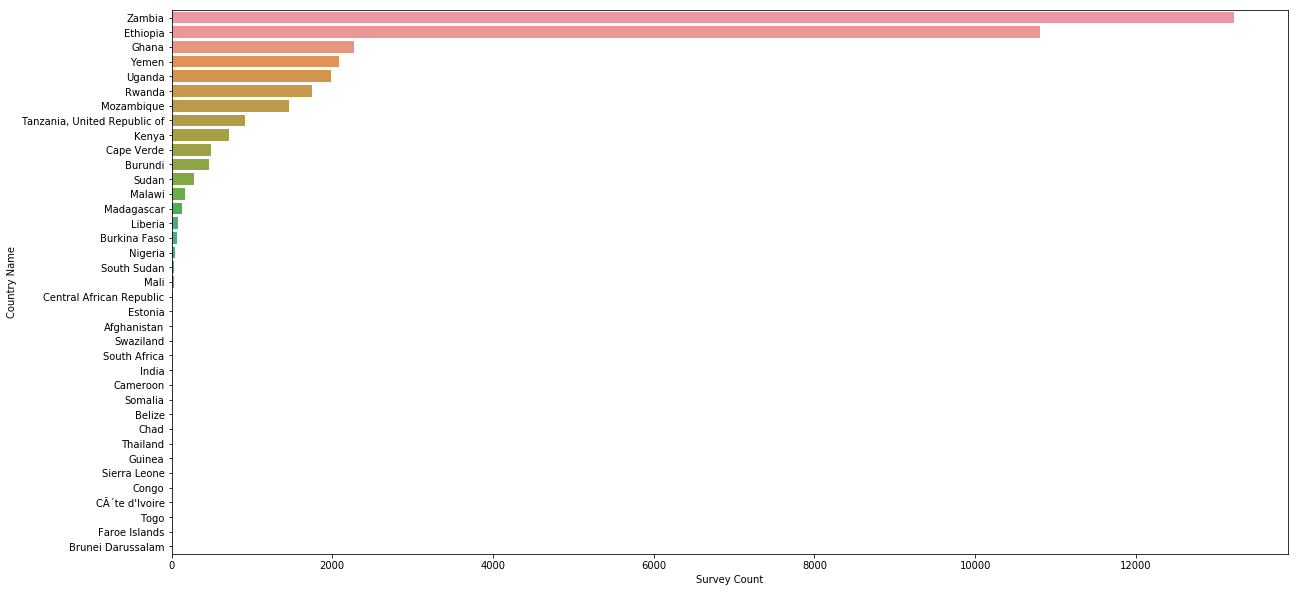

In [27]:
plt.figure(figsize=(20,10 ))
ax=sns.barplot(x="_id", y="Name", data=countries)
ax.set(xlabel='Survey Count', ylabel='Country Name')
plt.show()

### Training Received

In [28]:
training=FAMEWS_selected.groupby(["trainingReceived"]).count().sort_values("_id", ascending=False)['_id'].to_frame()

In [29]:
training = training.reset_index()
training

trainingReceived    _id
0                                     extensionService  20562
1                                                  fao   6747
2                                          focalPerson   3133
3                                 extensionService,fao   1605
4                                                 none    584
5                                                  ffs    493
6                                 fao,extensionService    488
7                                      focalPerson,fao    329
8                                              fao,ngo    286
9                                              fao,ffs    252
10                            extensionService,fao,ngo    250
11                    focalPerson,extensionService,fao    221
12                                extensionService,ffs    202
13                            fao,extensionService,ffs    138
14                        focalPerson,extensionService    112
15                                 focalPerson,ffs,fao     96
16                                extensionService,ngo     88
17            focalPerson,extensionService,ffs,fao,ngo     86
18                    focalPerson,fao,extensionService     78
19                                 focalPerson,fao,ngo     63
20                            extensionService,ffs,fao     57
21                            extensionService,private     56
22                                     fao,focalPerson     52
23                                             ngo,fao     52
24                            fao,ngo,extensionService     49
25                                ffs,extensionService     46
26                            extensionService,fao,ffs     44
27                                                 ngo     43
28                            ffs,fao,extensionService     40
29                                             ffs,fao     34
30                            fao,ffs,extensionService     31
31                                 fao,focalPerson,ffs     30
32                            ngo,fao,extensionService     29
33                focalPerson,extensionService,ffs,fao     27
34                                     focalPerson,ffs     26
35                                             private     26
36                        extensionService,focalPerson     25
37                           extensionService,ffs,none     25
38                       none,extensionService,ffs,fao     22
39                                focalPerson,fao,none     18
40                    extensionService,focalPerson,ffs     17
41            fao,extensionService,focalPerson,private     16
42                        extensionService,ffs,fao,ngo     16
43                                     focalPerson,ngo     16
44                                         fao,private     16
45                       extensionService,none,private     15
46                                         private,fao     14
47                         focalPerson,ffs,fao,private     14
48                    focalPerson,extensionService,ffs     13
49                focalPerson,extensionService,fao,ngo     11
50                    extensionService,fao,focalPerson     11
51       focalPerson,ffs,fao,extensionService,ngo,none     11
52                                 focalPerson,fao,ffs     11
53                            fao,extensionService,ngo     11
54                               extensionService,none     11
55               focalPerson,fao,extensionService,none     10
56                        extensionService,fao,ngo,ffs     10
57                               none,extensionService      9
58                           extensionService,fao,none      9
59                    fao,extensionService,focalPerson      8
60           none,extensionService,ffs,fao,focalPerson      8
61                        ffs,extensionService,private      8
62                         fao,focalPerson,ffs,private      8
63                focalPerson,ffs,extensionService,fao      8
64      

In [30]:
print(f' 1. Main training received are from {training["trainingReceived"][0]}, {training["_id"][0]} counts.')
print(f' 2. Main training received are from {training["trainingReceived"][1]}, {training["_id"][1]} counts.')
print(f' 3. Main training received are from {training["trainingReceived"][2]}, {training["_id"][2]} counts.')
print(f' 4. Main training received are from {training["trainingReceived"][3]}, {training["_id"][3]} counts.')
print(f' 5. Main training received are from {training["trainingReceived"][4]}, {training["_id"][4]} counts.')

 1. Main training received are from extensionService, 20562 counts.
 2. Main training received are from fao, 6747 counts.
 3. Main training received are from focalPerson, 3133 counts.
 4. Main training received are from extensionService,fao, 1605 counts.
 5. Main training received are from none, 584 counts.


In [31]:
FAMEWS_selected.head(3)

_id                     owner   date_date  \
0  5c62cf3f7fed8dcee83a0d61  5c6298d6f64ab0639e03cd75  2019-02-12   
1  5c62cf3f7fed8dcee83a0d61  5c6298d6f64ab0639e03cd75  2019-02-12   
2  5c62cf3dcb18c358c69ada20  5c6298d6f64ab0639e03cd75  2019-02-12   

                 date   Name country   region   locationName  latitude  \
0 2019-02-12 13:14:22  Ghana      GH  Western  Manso Amenfi   5.646451   
1 2019-02-12 13:14:22  Ghana      GH  Western  Manso Amenfi   5.646451   
2 2019-02-12 13:29:56  Ghana      GH  Western    K.  Boateng  5.636100   

   longitude  scouting  traps                  trainingReceived cropMain  \
0  -2.266976     False   True  extensionService,focalPerson,ffs  cowpeas   
1  -2.266976     False   True  extensionService,focalPerson,ffs  cowpeas   
2  -2.575280     False   True  focalPerson,extensionService,ffs    maize   

  cropVariety cropIrrigation cropFertilizer   cropStage   cropStage  \
0         NaN        rainFed             no  vegetative  vegetative   
1         NaN        rainFed             no  vegetative  vegetative   
2    Obatanpa        rainFed             no    seedling    seedling   

  cropHealth     cropSystem cropFieldSizeUnit_ha  cropFieldSize_ha  \
0     medium  intercropping                   ha          0.331849   
1     medium  intercropping                   ha          0.331849   
2       good       seasonal                   ha          0.607042   

  rotationIntercroppingCrop rainLastDate rainLastDate_date rainLastDate_date  \
0             cassavaManioc   2019-02-02        2019-02-02           10 days   
1             cassavaManioc   2019-02-02        2019-02-02           10 days   
2                       NaN   2019-02-02        2019-02-02           10 days   

  rainAmount  checked  faw  scoutingPlantsFAW  scoutingPercentageFAW  \
0      heavy      NaN  NaN                NaN                    NaN   
1      heavy      NaN  NaN                NaN                    NaN   
2   moderate      NaN  NaN                NaN                    NaN   

   totalFAW  totalAAW  totalBorer     trapType trapCondition  
0       NaN       NaN         NaN  stickyDelta       working  
1       NaN       NaN         NaN  stickyDelta       working  
2       NaN       NaN         NaN  stickyDelta       working

### Crops

In [47]:
by_crop=FAMEWS_selected.groupby("cropMain").count().sort_values("_id",ascending=False)['_id'].to_frame().reset_index()

print(f' We have {len(by_crop["cropMain"])} crops')
print()
print(f' The crops that we have are {by_crop["cropMain"].sort_values()}')
print('Notice the "Select". This means that some farmers did not select a crop')

 We have 23 crops

 The crops that we have are 22              Select
14             alfalfa
12              barley
4                beans
7        cassavaManioc
21              cotton
11             cowpeas
16             flowers
0                maize
8               millet
2         otherCereals
3          otherFruits
10        otherGrasses
18    otherRootsTubers
5      otherVegetables
6                 rice
1              sorghum
13             soybean
20           sugarcane
17                teff
9                weeds
15               wheat
19                 yam
Name: cropMain, dtype: object
Notice the "Select". This means that some farmers did not select a crop


**Main crop count (All countries)**

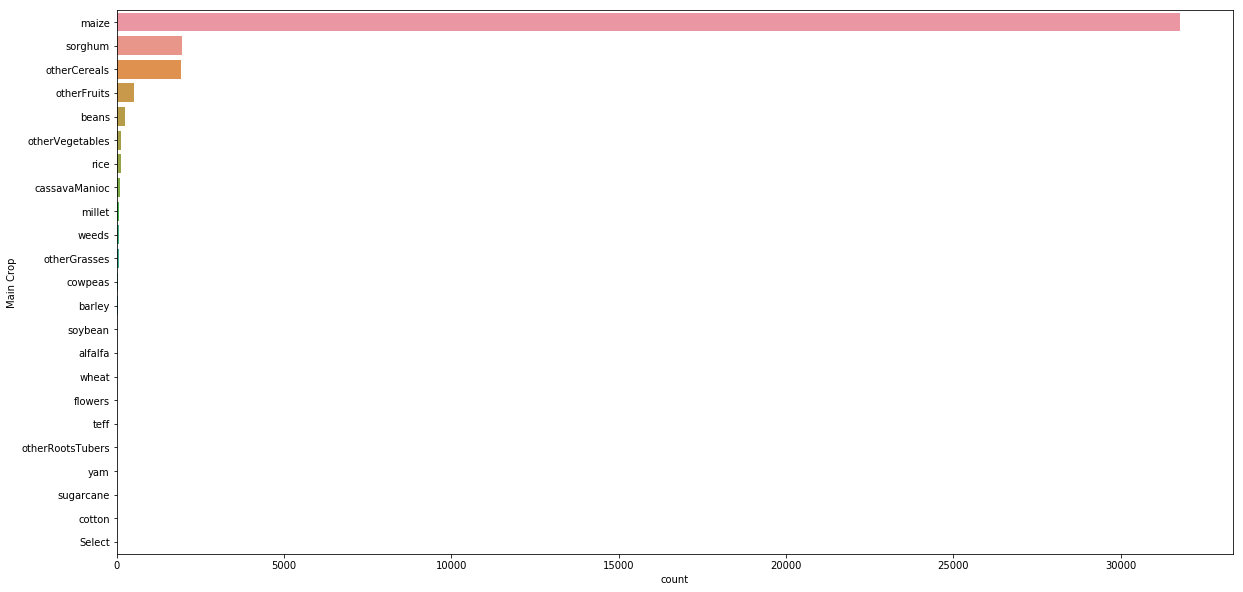

In [49]:
plt.figure(figsize=(20,10 ))
ax=sns.barplot(x="_id", y="cropMain", data=by_crop)
ax.set(xlabel='count', ylabel='Main Crop')
plt.show()

**Number of crops per country**

In [60]:
main_crop1=FAMEWS_selected.groupby(["Name","cropMain"]).count().sort_values("_id", ascending=False)['_id'].to_frame()
main_crop1= main_crop1.reset_index()
main_crop1=main_crop1.sort_values(["Name",'_id'], ascending=[True, False])
main_crop1.head(4)


Name cropMain  _id
63        Afghanistan  alfalfa    4
90        Afghanistan    maize    2
64             Belize  cowpeas    4
98  Brunei Darussalam    maize    1

**Crop per region in each country**

In [53]:
main_crop2=FAMEWS_selected.groupby(["Name","region","cropMain"]).count().sort_values("_id", ascending=False)['_id'].to_frame()
main_crop2= main_crop1.reset_index()
main_crop2.sort_values(['Name', '_id'], ascending=[False, False])

index                          Name          cropMain    _id
116      0                        Zambia             maize  13036
117     17                        Zambia             beans    165
118     43                        Zambia           soybean     10
119     47                        Zambia            millet      7
120     59                        Zambia           sorghum      5
121     70                        Zambia           alfalfa      3
106      7                         Yemen             maize   1328
107     10                         Yemen           sorghum    710
108     33                         Yemen            millet     28
109     48                         Yemen             wheat      7
110     79                         Yemen      otherCereals      2
111     85                         Yemen         sugarcane      2
112     92                         Yemen       otherFruits      1
113     95                         Yemen             beans      1
114     96                         Yemen            barley      1
115     97                         Yemen           soybean      1
100      4                        Uganda             maize   1893
101     29                        Uganda            millet     37
102     32                        Uganda             beans     31
103     40                        Uganda           sorghum     13
104     67                        Uganda     cassavaManioc      3
105     81                        Uganda           alfalfa      2
99      94                          Togo            barley      1
98      91                      Thailand             maize      2
89       9  Tanzania, United Republic of             maize    776
90      24  Tanzania, United Republic of      otherGrasses     52
91      28  Tanzania, United Republic of              rice     38
92      31  Tanzania, United Republic of   otherVegetables     36
93      53  Tanzania, United Republic of     cassavaManioc      6
94      74  Tanzania, United Republic of            millet      2
95     100  Tanzania, United Republic of             weeds      1
96     116  Tanzania, United Republic of            Select      1
97     121  Tanzania, United Republic of      otherCereals      1
88      50                     Swaziland             maize      6
83      15                         Sudan             maize    224
84      25                         Sudan           sorghum     48
85      62                         Sudan           alfalfa      4
86      75                         Sudan       otherFruits      2
87     114                         Sudan            millet      1
78      37                   South Sudan           sorghum     18
79      46                   South Sudan             maize      8
80     108                   South Sudan             beans      1
81     109                   South Sudan     cassavaManioc      1
82     110                   South Sudan      otherGrasses      1
77      51                  South Africa             maize      6
75      71                       Somalia             maize      3
76     107                       Somalia           sorghum      1
74     106                  Sierra Leone             maize      1
72       5                        Rwanda             maize   1738
73      60                        Rwanda             beans      4
70      27                       Nigeria             maize     40
71     105                       Nigeria     cassavaManioc      1
66       6                    Mozambique             maize   1461
67      61                    Mozambique             beans      4
68     103                    Mozambique       otherFruits      1
69     104                    Mozambique      otherGrasses      1
63      35                          Mali             maize     23
64      99                          Mali  otherRootsTubers      1
65     118                          Mali   otherVegetables      1
62      16                        Malawi     

**Main Crops By Country**

In [61]:
by_crop.sort_values("_id",ascending=False)

cropMain    _id
0              maize  31763
1            sorghum   1934
2       otherCereals   1927
3        otherFruits    502
4              beans    238
5    otherVegetables    124
6               rice    112
7      cassavaManioc    103
8             millet     79
9              weeds     68
10      otherGrasses     56
11           cowpeas     50
12            barley     21
13           soybean     17
14           alfalfa     15
15             wheat      9
16           flowers      5
17              teff      4
18  otherRootsTubers      3
19               yam      2
20         sugarcane      2
21            cotton      2
22            Select      1

In [62]:
crops = dict()
for crop in by_crop.cropMain:
    crops[crop] = main_crop1[main_crop1['cropMain'] == crop].sort_values("_id", ascending=False)

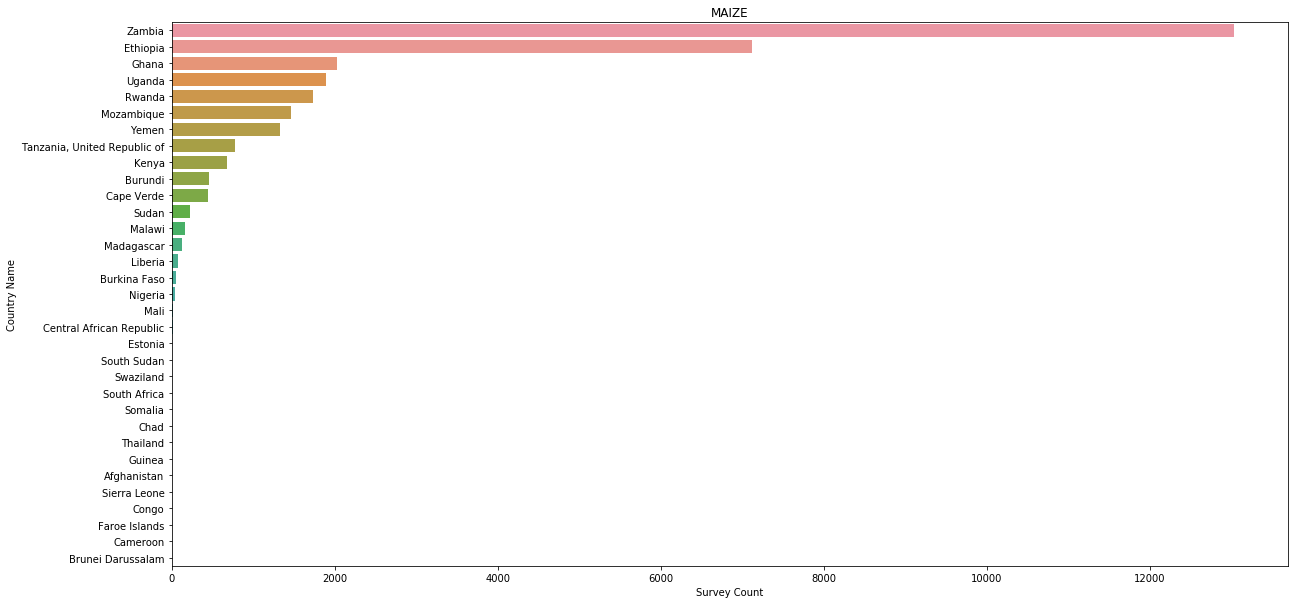

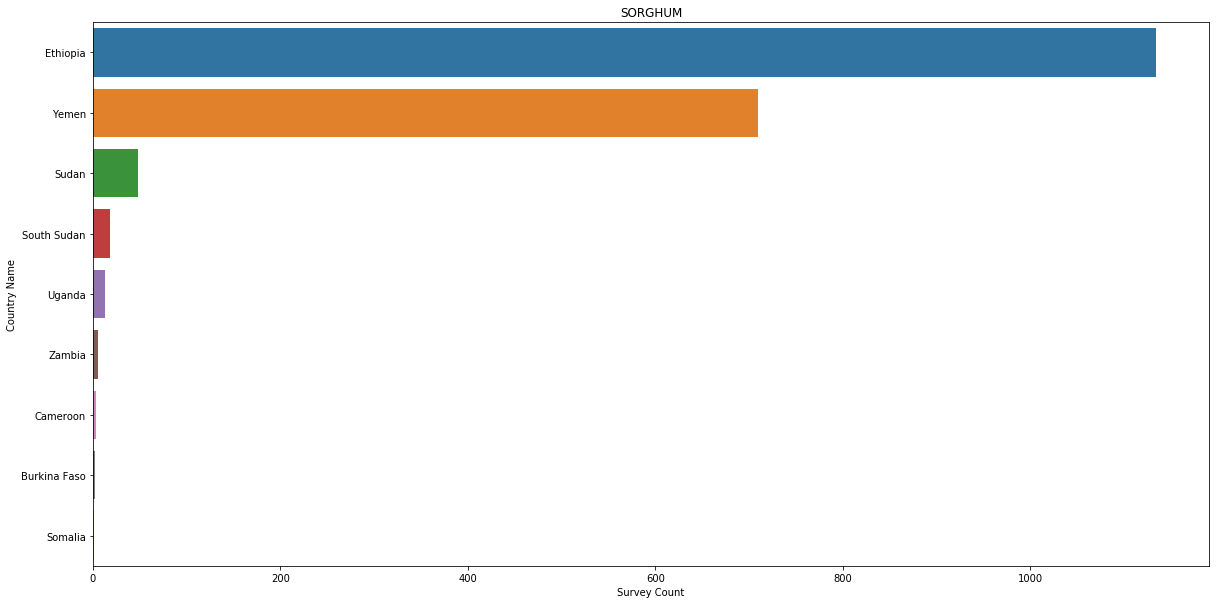

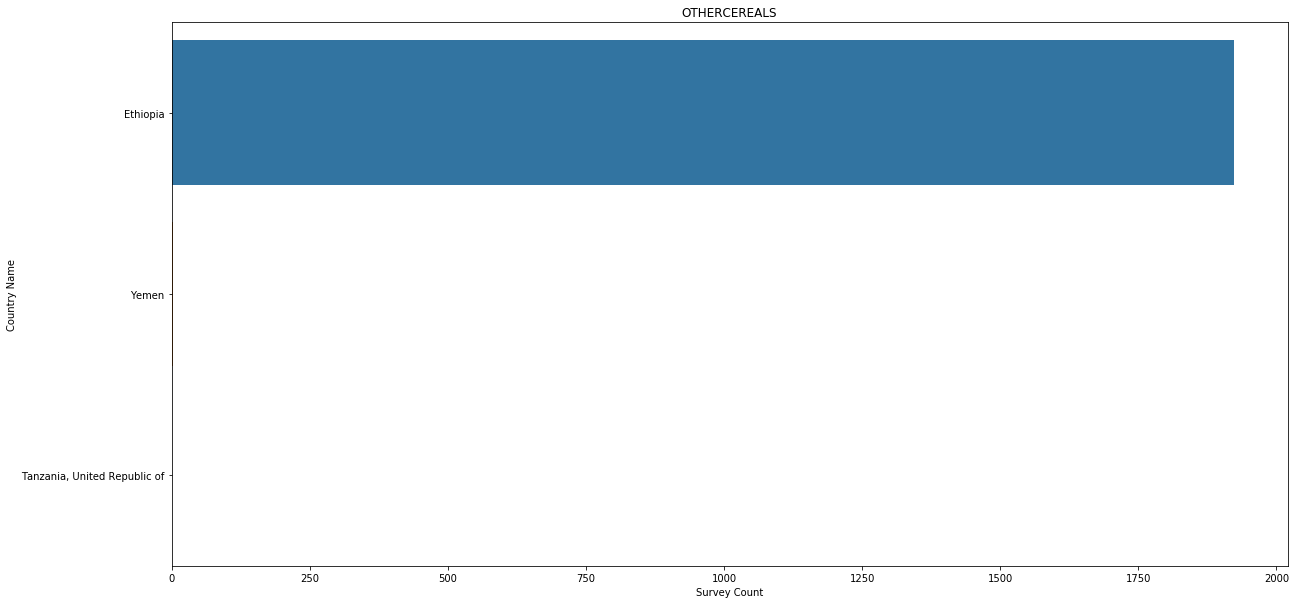

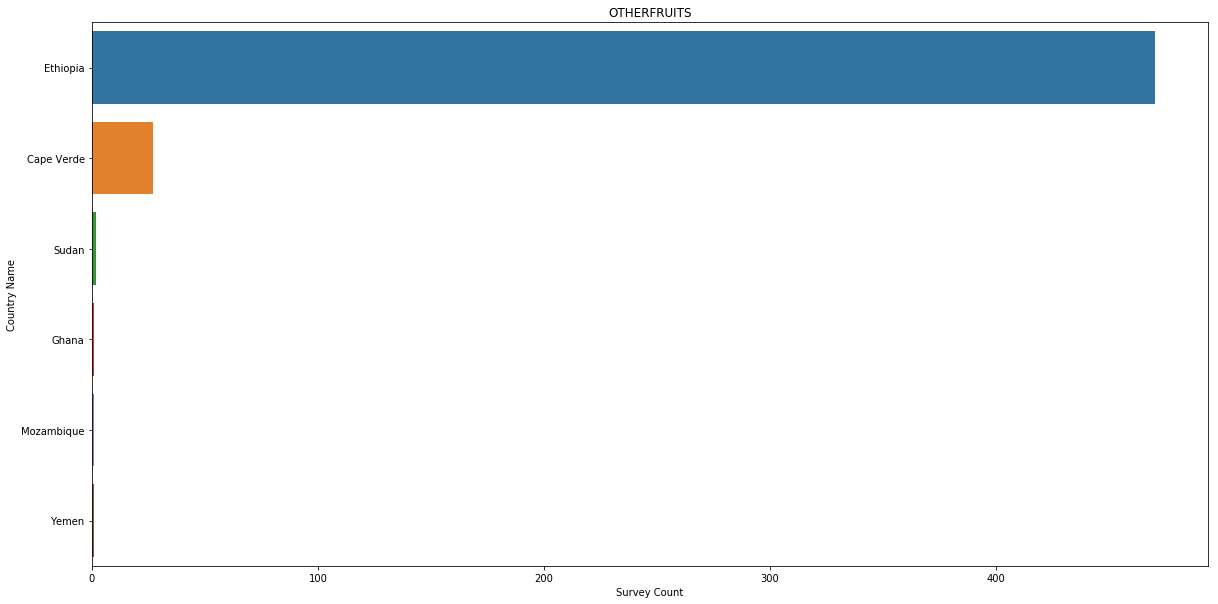

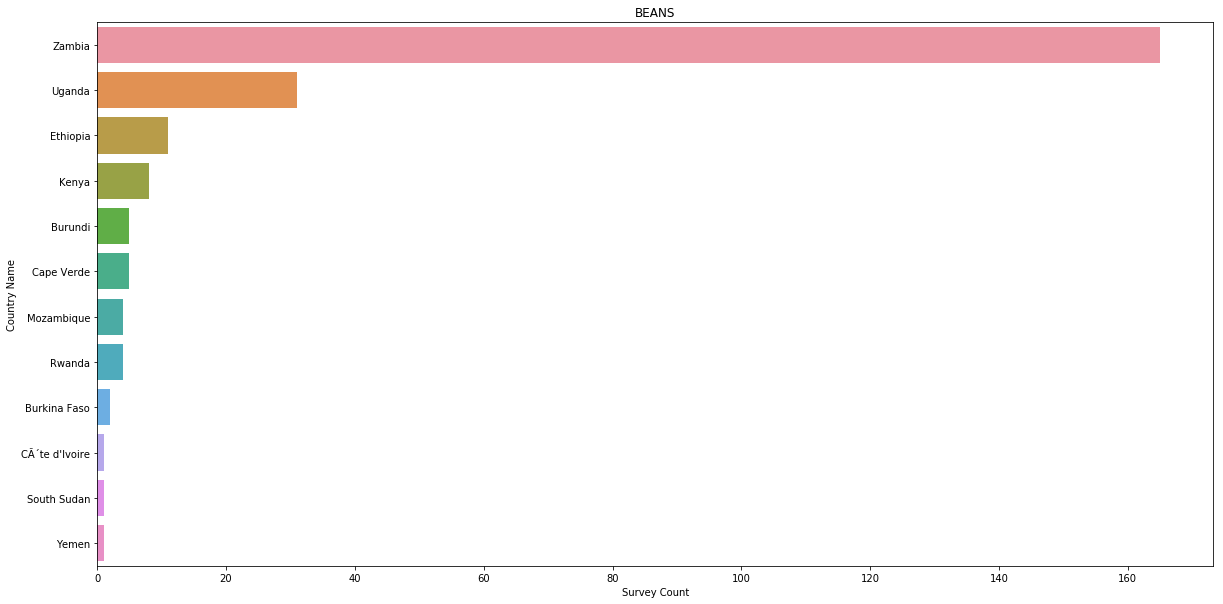

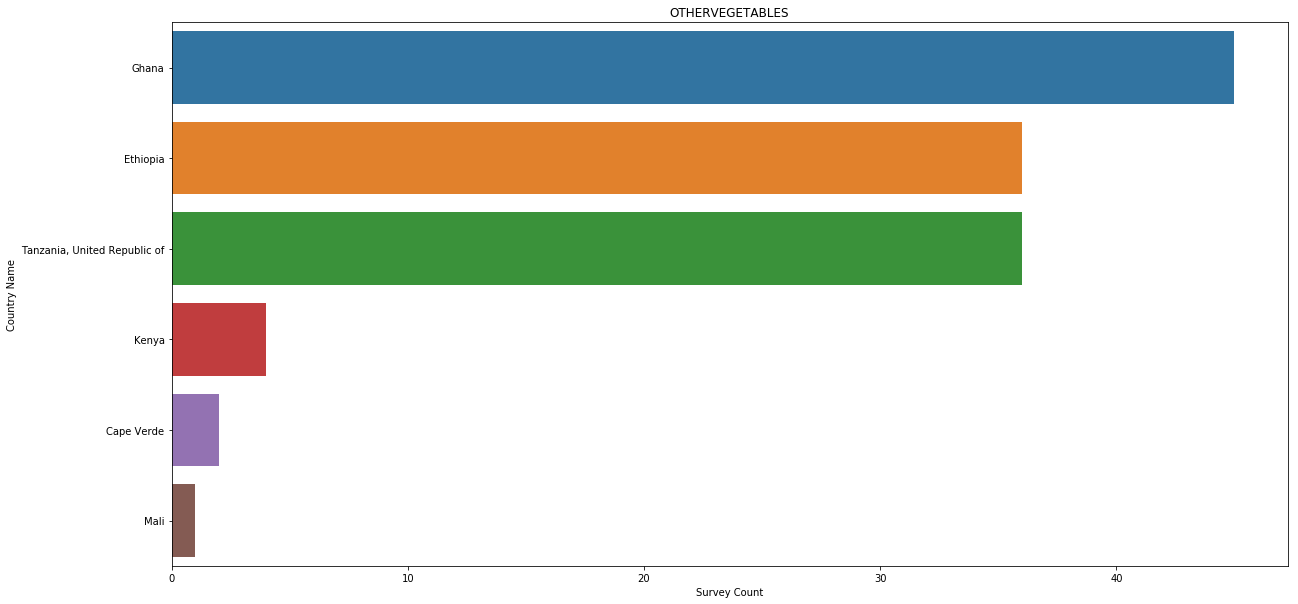

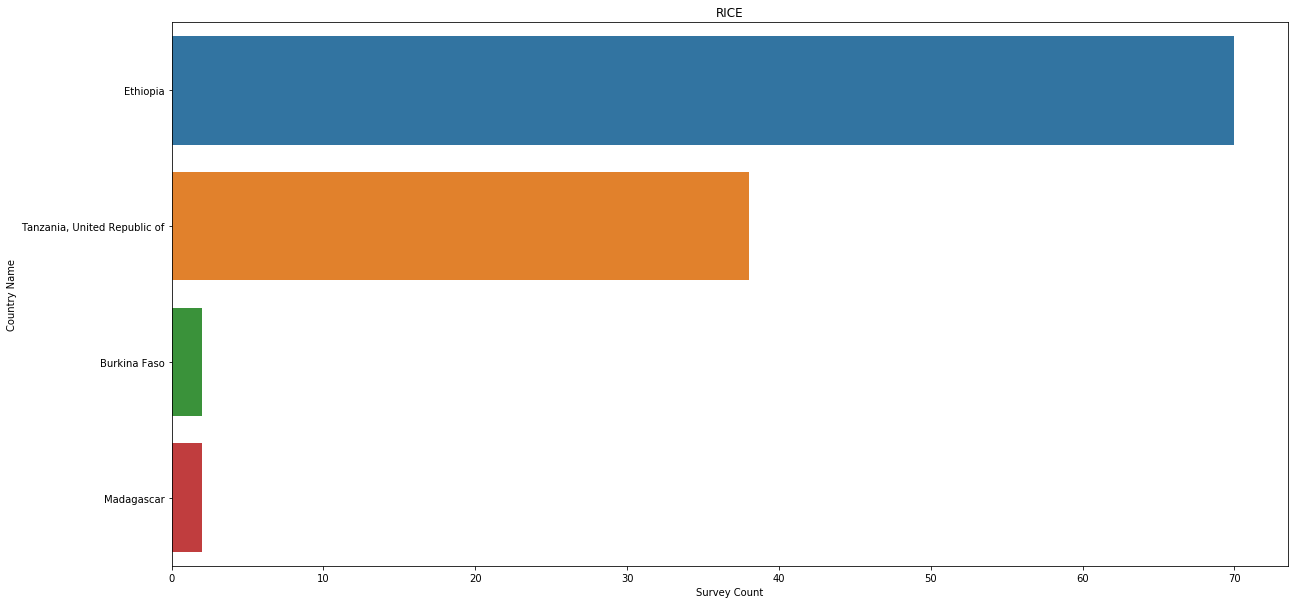

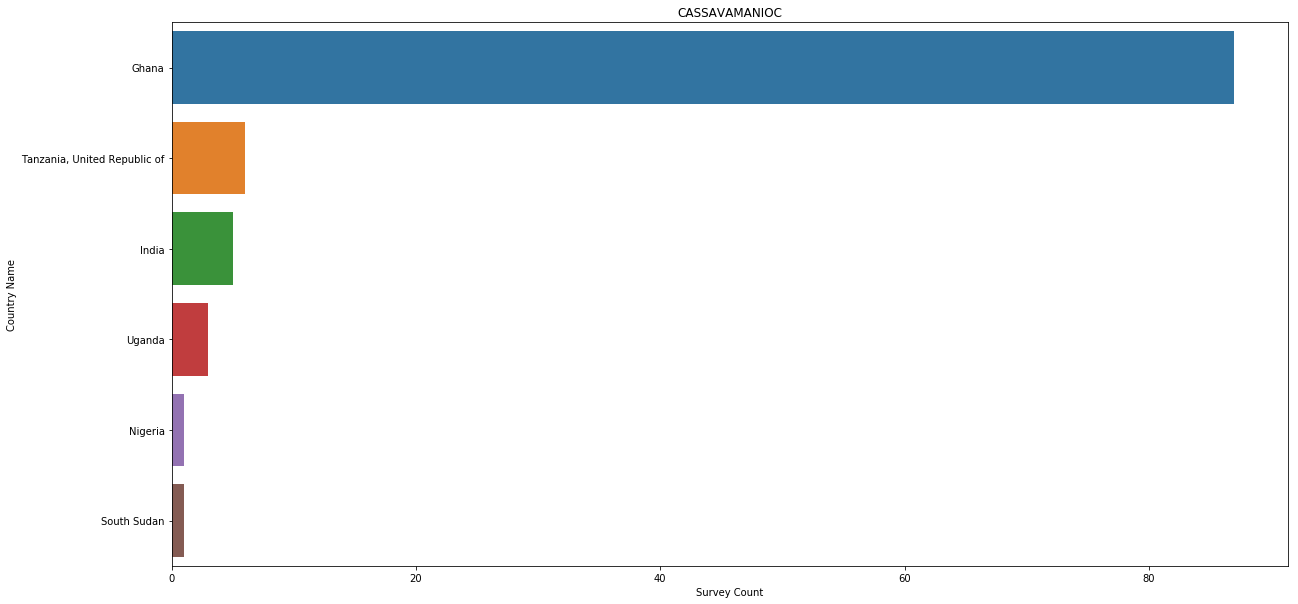

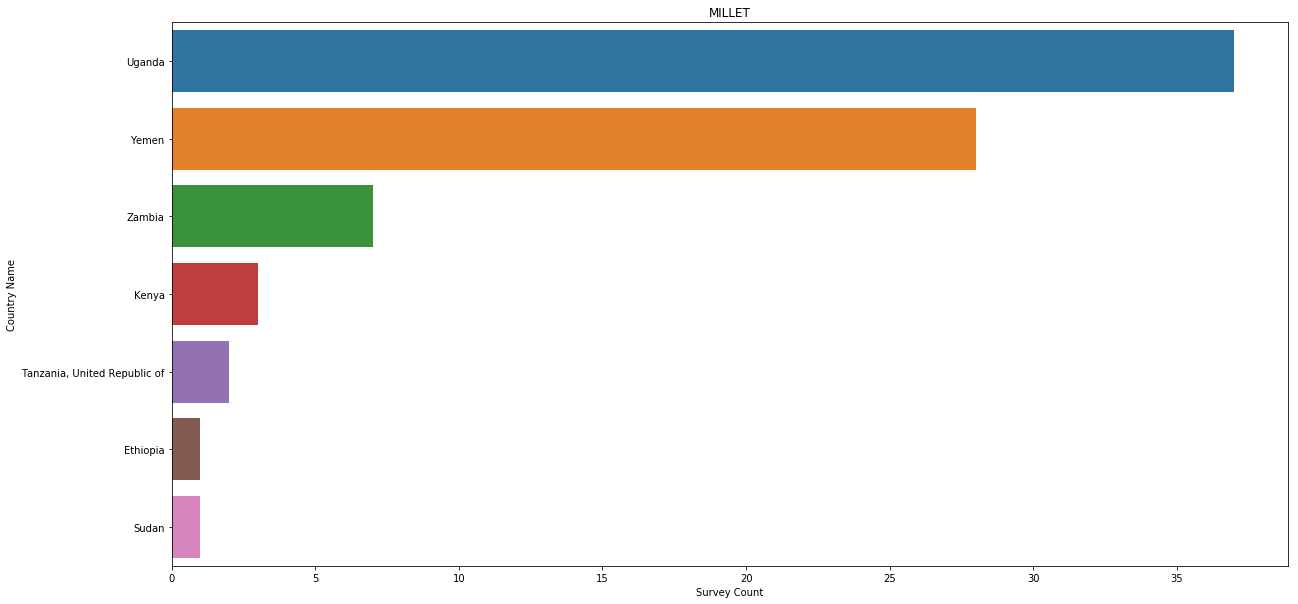

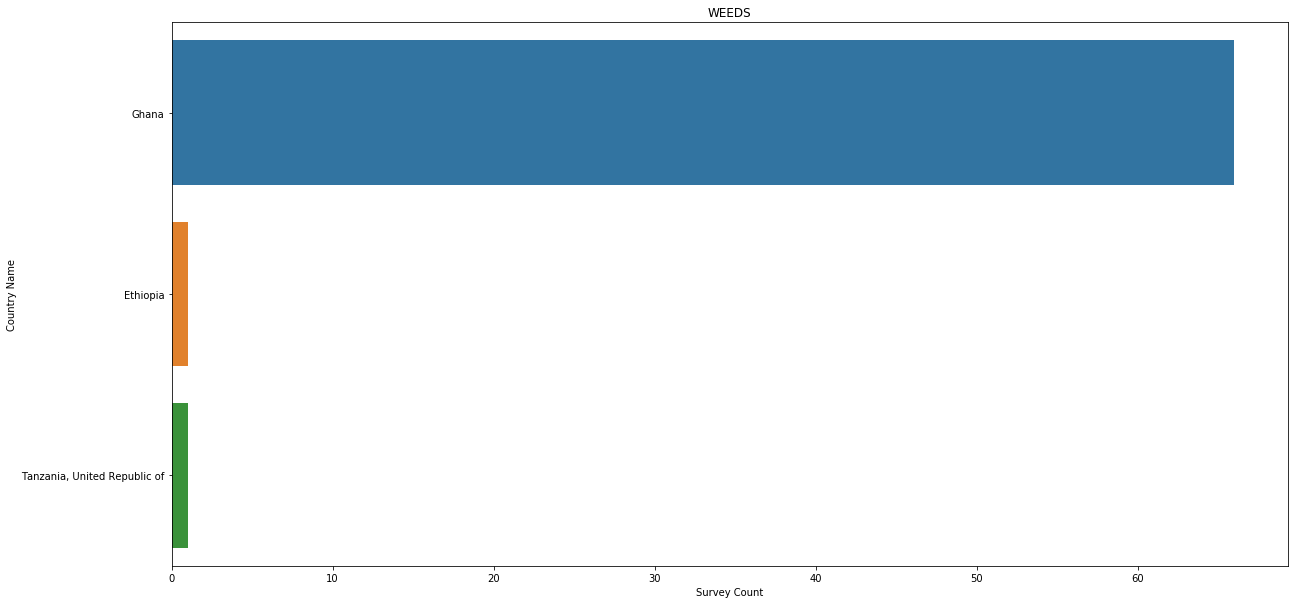

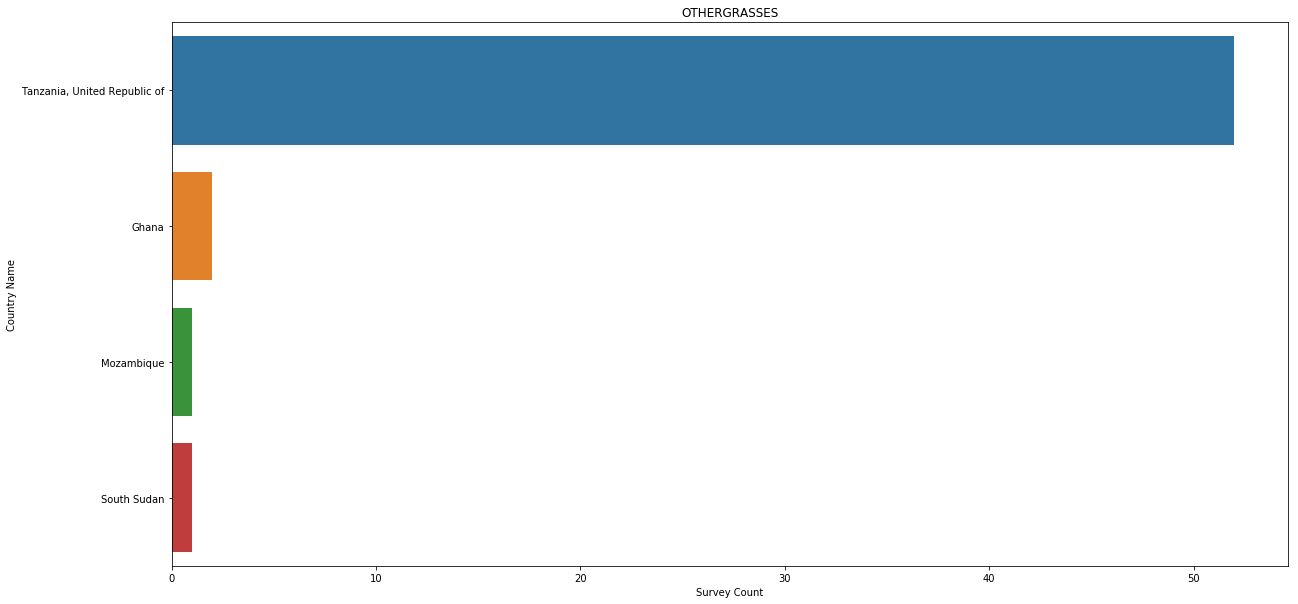

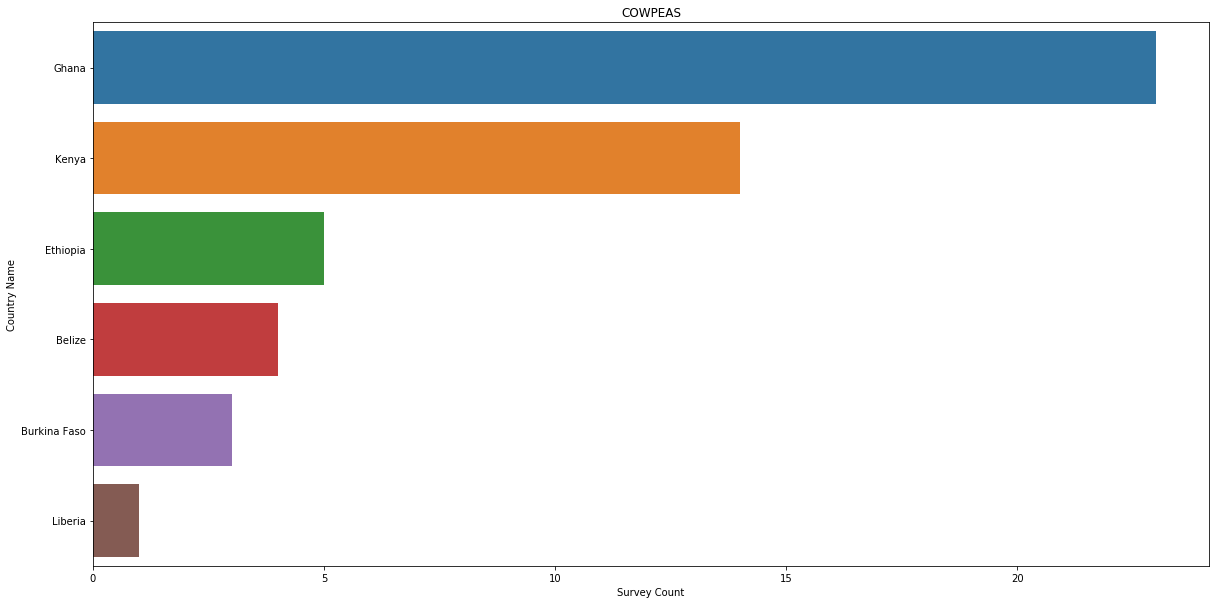

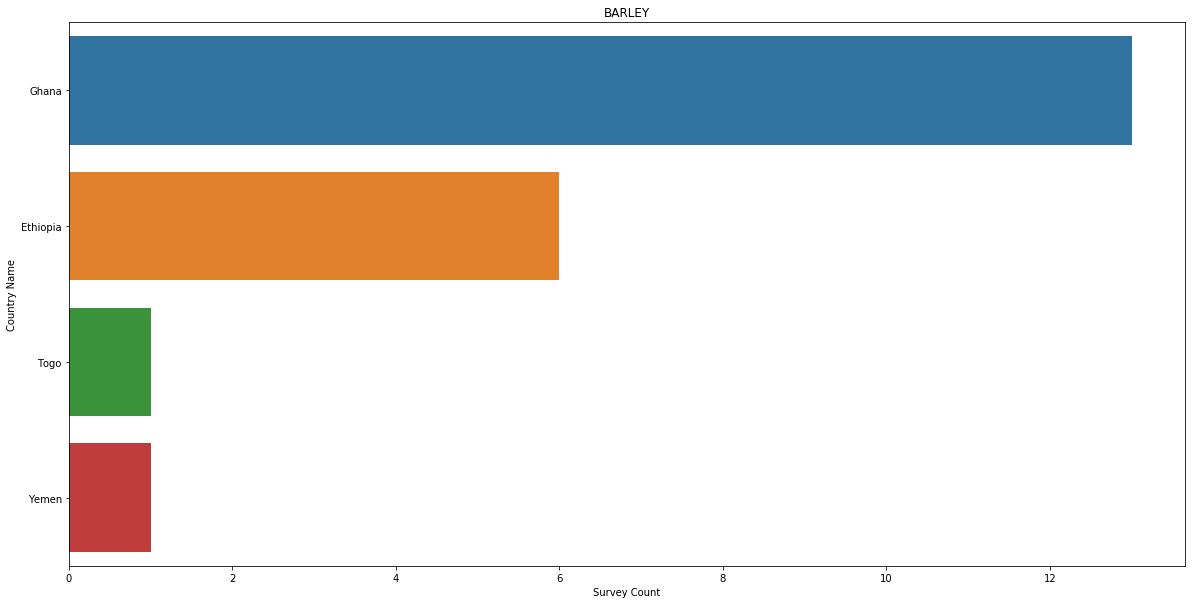

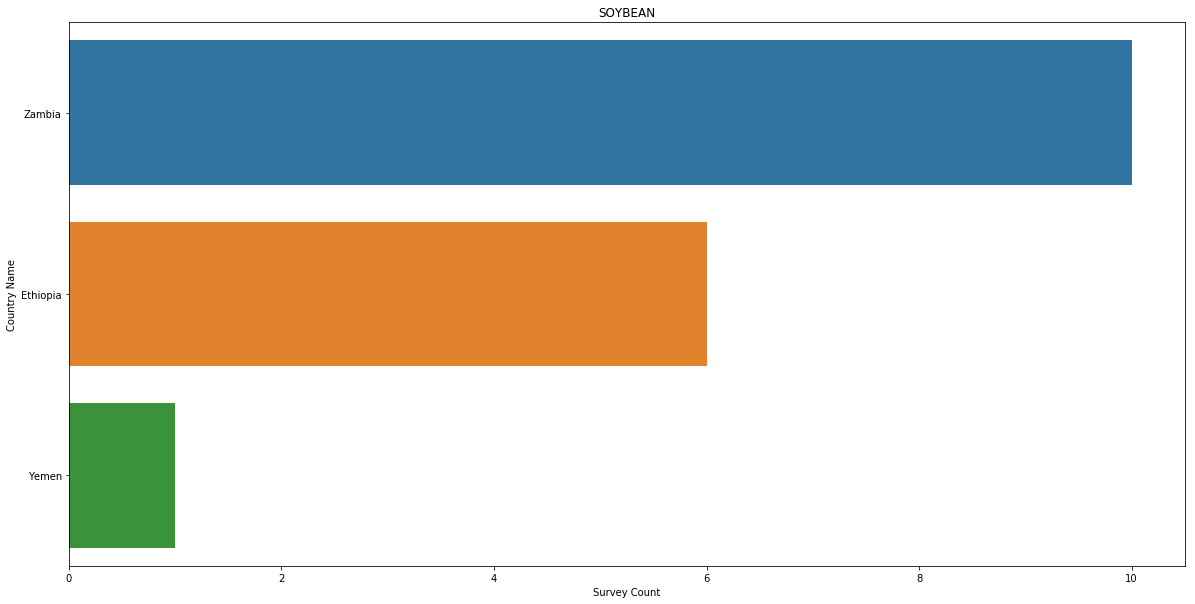

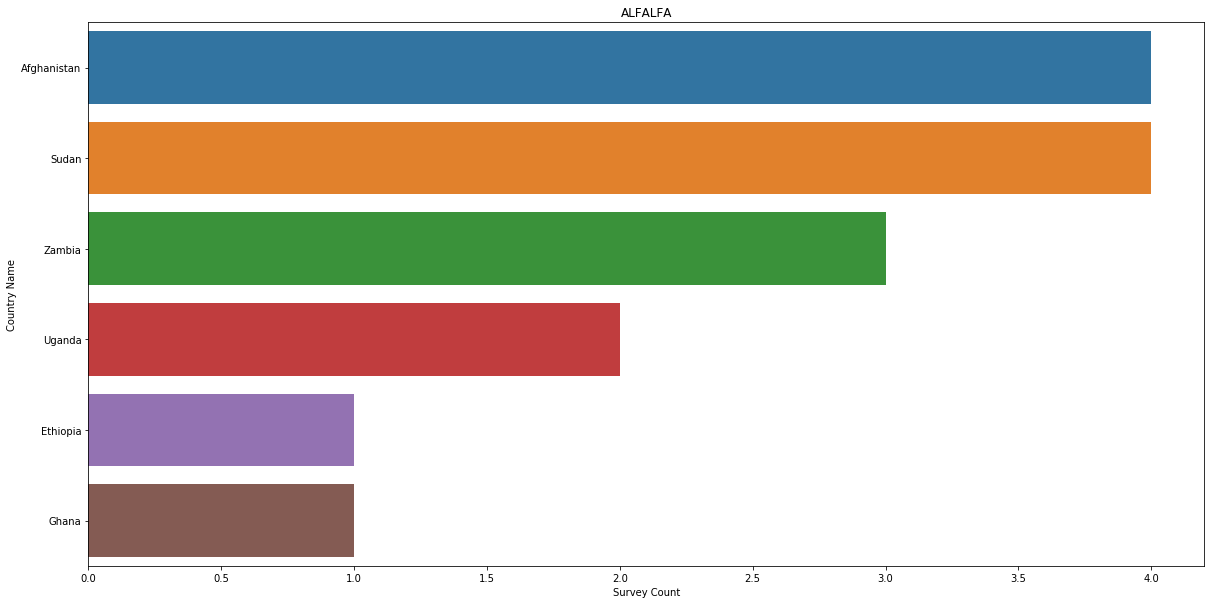

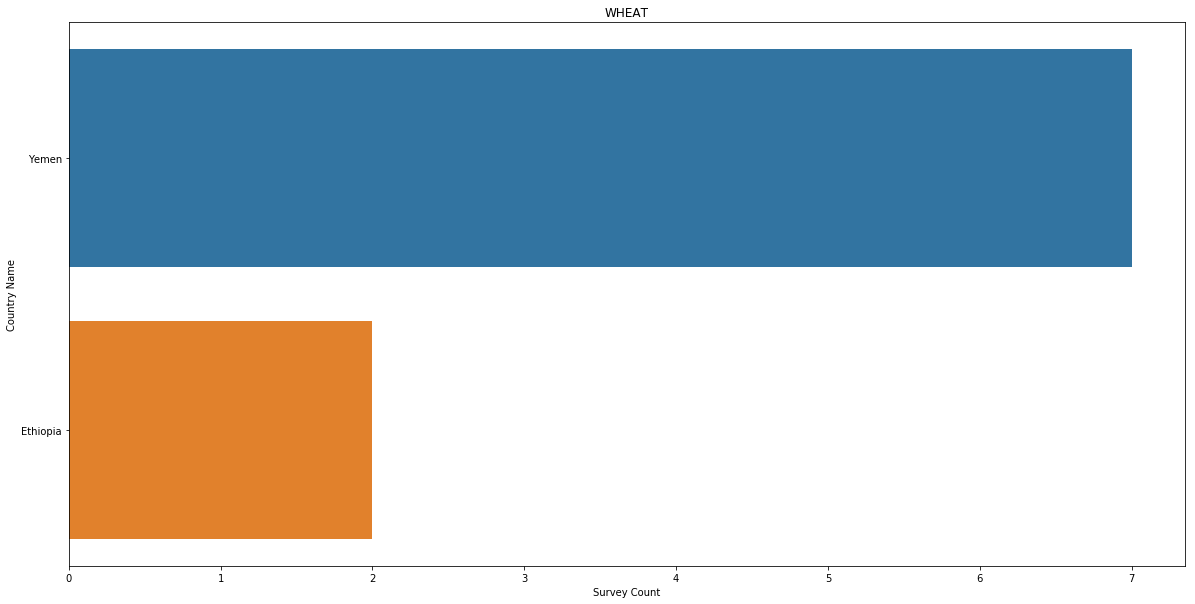

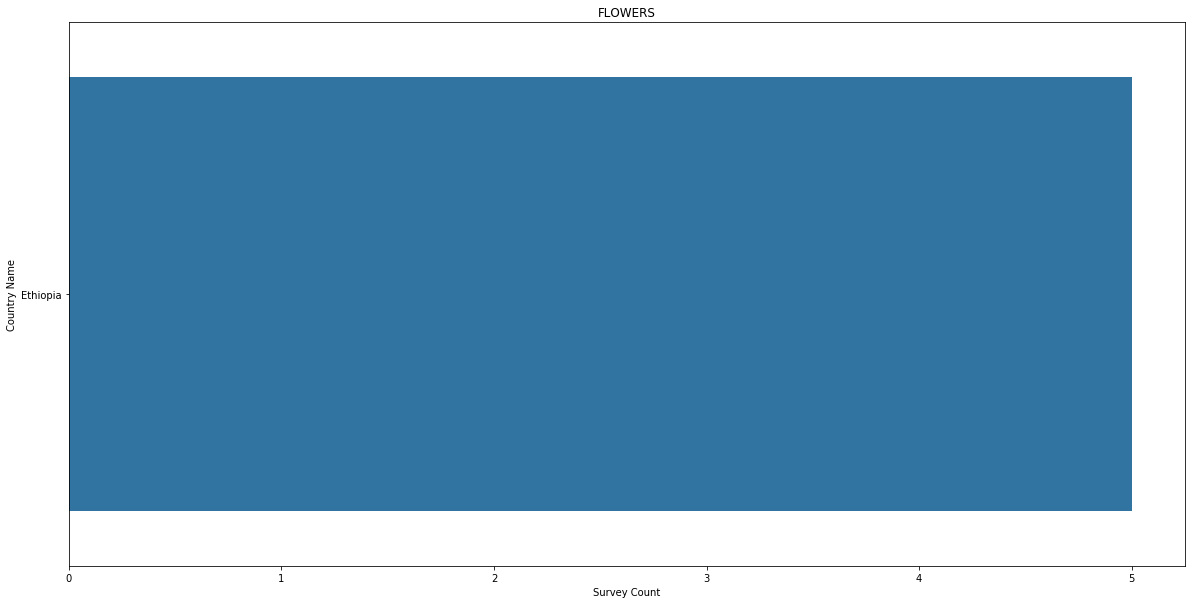

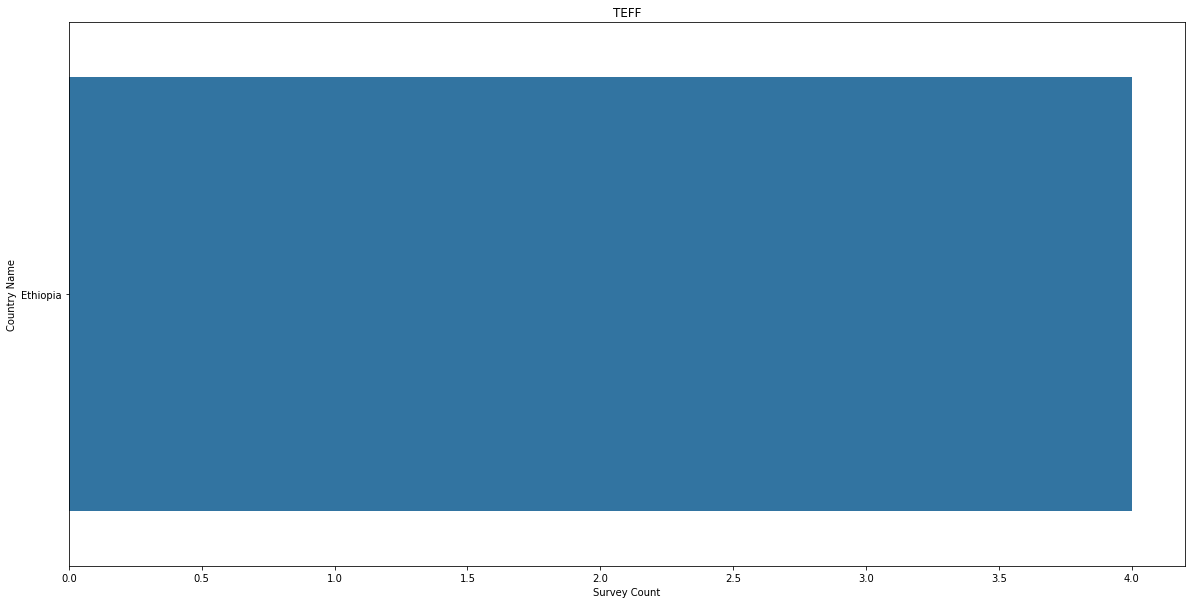

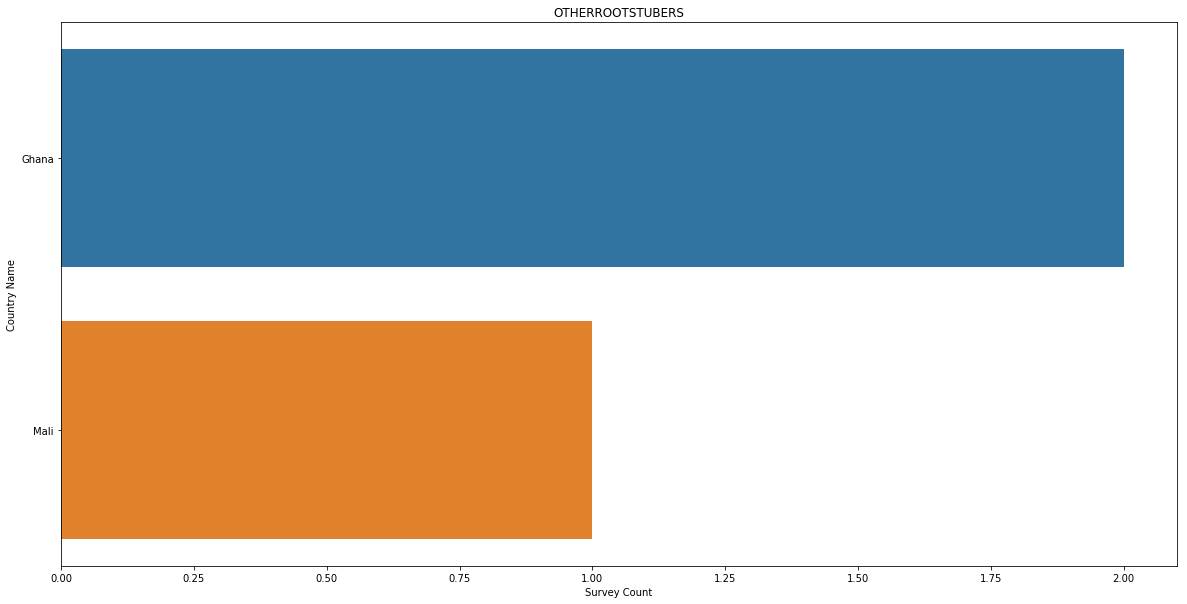

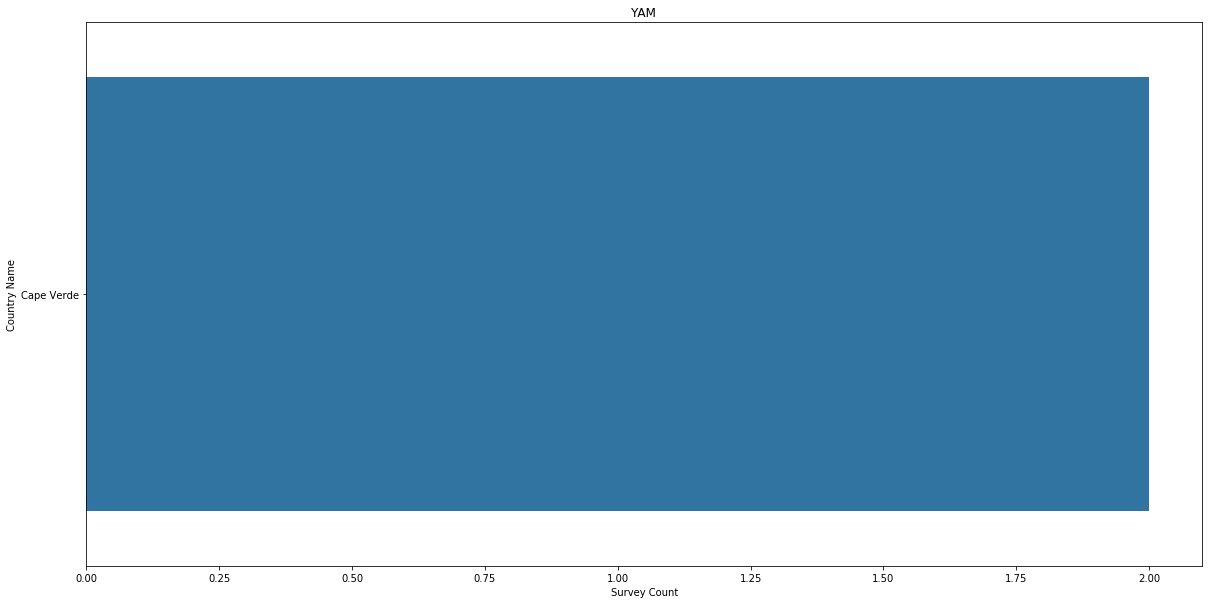

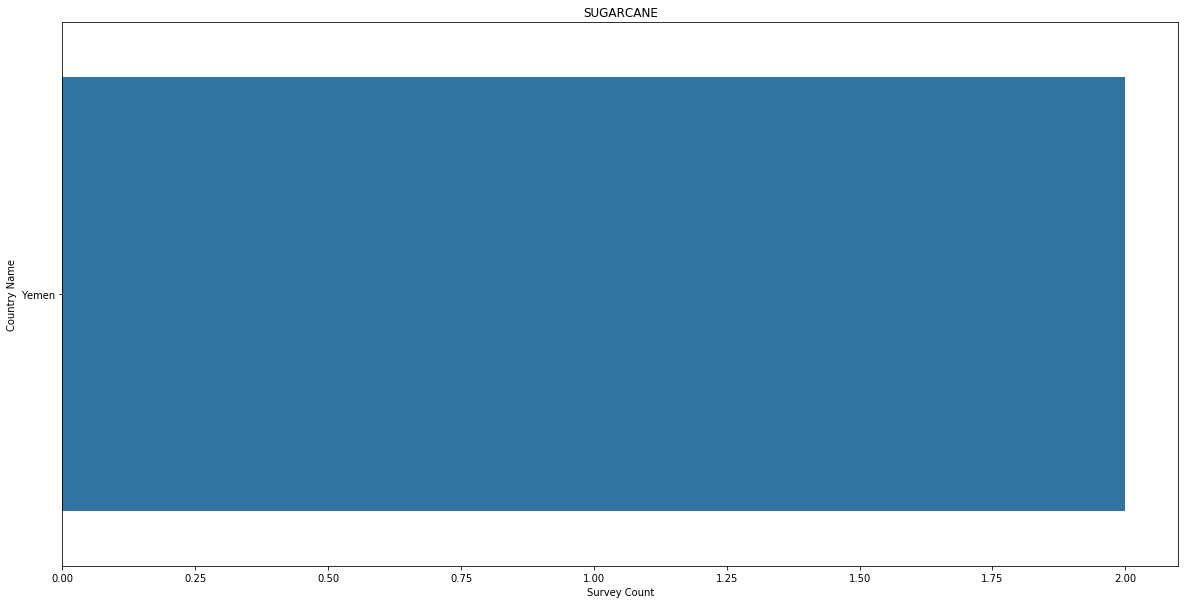

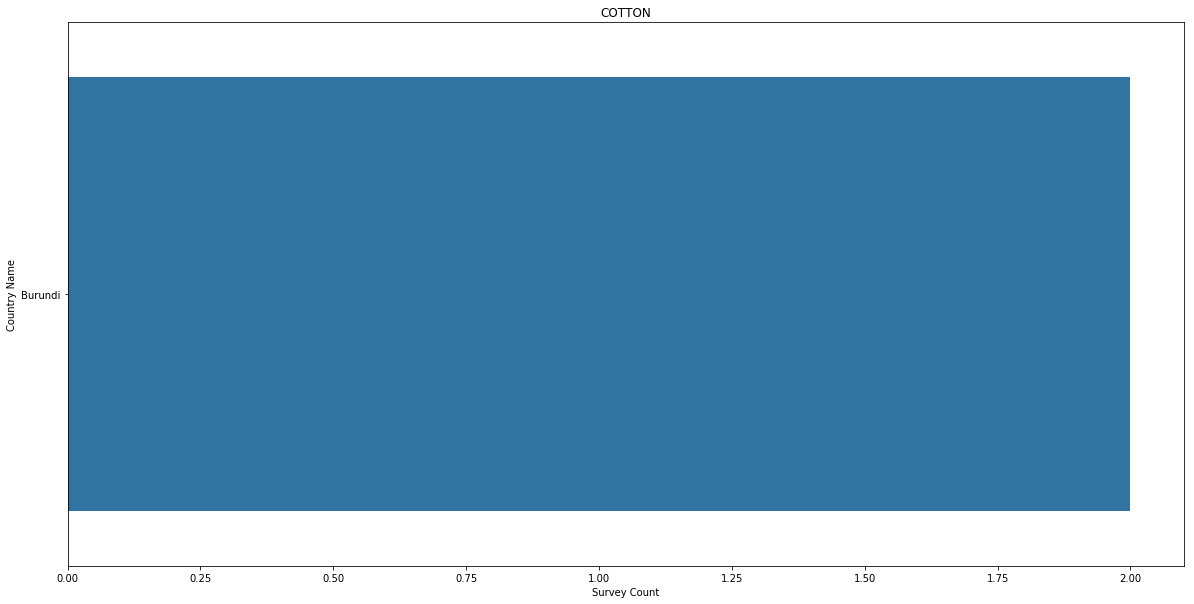

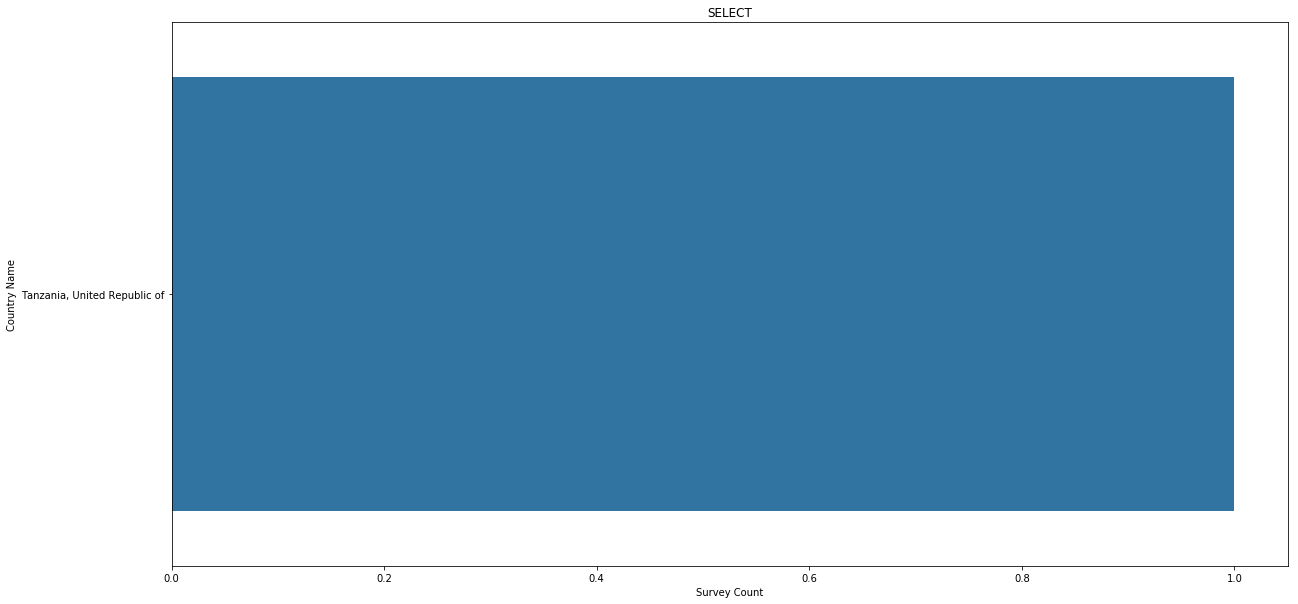

In [63]:
for key in crops.keys():    
    plt.figure(figsize=(20,10 ))
    ax=sns.barplot(x="_id", y="Name", data=crops[key])
    ax.set(xlabel='Survey Count', ylabel='Country Name', title=key.upper())
    plt.show()

In [ ]:
#trapsConfirmedFAW, FAWcropdamage

## 1. 

### FAW by main crop

## 2.

### FAW by crop stage 

## 3.

### FAW by crop system 

## Outliers 





## Buffer Zones

In [ ]:
# Check CRS -- World Mercator, units of meters.
from shapely.geometry import Point, Polygon
#FAMEWS_new['geometry']= [Point(x,y).buffer(500000) for x,y in zip(FAMEWS_new['longitude'],FAMEWS_new['latitude'])]
#FAMEWS_new['geometry']= FAMEWS_new['geometry'].apply(Point)
#crs ={'init':'epsg:3395'}
geo_FAMEWS= gpd.GeoDataFrame([
    {'geometry': Point(x,y).buffer(500000),"latitude":y, "longitude":x}
    for x,y in zip(FAMEWS_new['longitude'],FAMEWS_new['latitude'])])
# Previously inside of the Geo Data Frame - FAMEWS_new[["Name", "date","longitude","latitude"]],geometry="geometry")
print(geo_FAMEWS.head())
#geo_FAMEWS['geometry']=geo_FAMEWS.buffer(500000)
#geo_FAMEWS.plot()


In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Select Africa and some columns
region= world[(world['continent'] != "South America") &(world['continent'] != "North America")&(world['continent'] != "Antarctica")]
#region['geometry'].crs=({'init':'epsg:3395'})
ax=region.plot(figsize=(50, 50), alpha=0.5, edgecolor='k')
geo_FAMEWS.plot(ax=ax, color='green')

In [ ]:
#make 500km buffer
#geo_FAMEWS['geometry']=geo_FAMEWS.buffer(500000)
#holes=geo_FAMEWS.buffer(500000)
geo_FAMEWS.plot(markersize=20,facecolors='none',edgecolor='r',alpha=0.5)

Possibly locations to look into (coordiates)

In [ ]:
#region.head()
#geo_FAMEWS=geo_FAMEWS[["Name","date","longitude","latitude","geometry"]]
type(geo_FAMEWS)
#newdf = gpd.overlay(region, geo_FAMEWS, how="union")

In [ ]:
#lat top = 19, bottom = -35
#long left = -20, right = 52
#FAMEWS_new[(FAMEWS_new['latitude'] >=-35)  &  (FAMEWS_new['latitude'] <=19)& (FAMEWS_new['longitude'] <=52)& (FAMEWS_new['longitude'] >= -20)]


Number of regions

In [ ]:
len(FAMEWS_unique['region'].unique())

Number of counries

In [ ]:
len(FAMEWS_unique['country'].unique())

# Zambia

In [ ]:
Zambia_training=Zambia.groupby(['trainingReceived']).count()[["_id"]].reset_index()

#--- Total
total= sum(Zambia_training["_id"])

#---extensionService
extensionService= Zambia_training[Zambia_training['trainingReceived']=='extensionService']["_id"]
extensionService_prop=(extensionService/total)*100 
extensionService_prop

#--- FAO
fao= Zambia_training[Zambia_training['trainingReceived']=='fao']["_id"]
fao_prop=(fao/total)*100 

#--- None
no_training= Zambia_training[Zambia_training['trainingReceived']=='none']["_id"]
no_training_prop=(no_training/total)*100 

#---
print(extensionService_prop,fao_prop,no_training_prop)


In [ ]:
Zambia.groupby(['trainingReceived']).count()["_id"].plot.bar()

In [ ]:
len(Zambia.groupby(['region']).count())

# Ghana 

In [ ]:
Ghana= FAMEWS_unique[FAMEWS_unique['Name']=='Ghana']
Ghana.head(10)

In [ ]:
Ghana.groupby(['trainingReceived']).count()

In [ ]:
Ghana_training=Ghana.groupby(['trainingReceived']).count()[["_id"]].reset_index()

Ghana_training.sort_values("_id", ascending=False)

In [ ]:
#--- Total
total= sum(Ghana_training["_id"])

#---extensionService
extensionService_g= Ghana_training[Ghana_training['trainingReceived']=='extensionService']["_id"]
extensionService_g_prop=(extensionService_g/total)*100 
extensionService_g_prop

#--- FAO
fao_ext_g= Ghana_training[Ghana_training['trainingReceived']=='extensionService,fao']["_id"]
fao_ext_g_prop=(fao_ext_g/total)*100 



#---
print(extensionService_g_prop,fao_ext_g_prop)

In [ ]:
len(Ghana.groupby(['region']).count())

# Ethiopia 

In [ ]:
Ethiopia= FAMEWS_unique[FAMEWS_unique['Name']=='Ethiopia']
Ethiopia.head(10)

In [ ]:
Ethiopia_training=Ethiopia.groupby(['trainingReceived']).count()[["_id"]].reset_index()

Ethiopia_training.sort_values("_id", ascending=False)

In [ ]:

#--- Total
total_e= sum(Ethiopia_training["_id"])

#---extensionService
extensionService_e= Ethiopia_training[Ghana_training['trainingReceived']=='extensionService']["_id"]
extensionService_e_prop=(extensionService_e/total_e)*100 
extensionService_e_prop

#--- FocalPerson
focal_e= Ethiopia_training[Ethiopia_training['trainingReceived']=='focalPerson']["_id"]
focal_e_prop=(focal_e/total_e)*100 

#--- fao
fao_e= Ethiopia_training[Ethiopia_training['trainingReceived']=='fao']["_id"]
fao_e_prop=(fao_e/total_e)*100 

#--- extensionService,fao
#fao_ext_e= Ethiopia_training[(Ethiopia_training['trainingReceived']=='extensionService,fao')& (Ethiopia_training['trainingReceived']=='fao,extensionService')]["_id"]
fao_ext_e_prop=((641+246)/total_e)*100 


#---
print(extensionService_e_prop,focal_e_prop,fao_e_prop,fao_ext_e_prop)

In [ ]:
len(Ethiopia.groupby(['region']).count())

# Mozambique 

In [ ]:
len(gen1[gen1['country']=='MZ'])

In [ ]:
gen1[gen1['country']=='MZ'].head(10)

In [ ]:
MZ_unique= gen1[gen1['country']=='MZ'].drop_duplicates()
len(MZ_unique)
# unique entries - 1467

In [ ]:
# testing in how many variables does the variables differ
diff_count = (MZ_unique.iloc[1] == MZ_unique.iloc[0])
diff_count.value_counts()
# True     49
# False    27


In [ ]:
# Identifying how are each row distinct (e.g. same user id, but several entries)
#diff_count=diff_count.to_frame()
diff_count[diff_count[0]==False].head()

In [ ]:
MZ_unique_owner=MZ_unique['owner'].unique()
len(MZ_unique_owner)
# owners - 90 

In [ ]:
MZ_unique_user=MZ_unique['_id'].unique()
len(MZ_unique_user)
# unqiue ID's-  609 

In [ ]:
MZ_unique_form=MZ_unique['form'].unique()
len(MZ_unique_form)
# unique forms- where am I getting the 382 surveys 